In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import LineCollection
from scipy import stats
import itertools
import seaborn as sns
import seaborn_image as isns
%matplotlib inline

In [2]:
# Set visualisation parameters
sns.set_context("notebook", rc={"font.family": 'sans-serif',
                                'font.sans-serif': 'Helvetica'})
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Helvetica']

# Visualisation Functions

In [3]:
def category_plotting(x, y, hue, data, order = []):
    fig,ax = plt.subplots()
    sns.boxplot(x = x,
                y = y,
                hue = hue,
                data = data,
                order = order, palette = ['gainsboro', 'red'])

    sns.swarmplot(x = x,
                  y = y,
                  hue = hue,
                  data = data,
                  order = order,
                  dodge = True, color = 'black')

    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles[0:2], labels[0:2],
                   bbox_to_anchor=(1.05, 1), 
                   loc=2, borderaxespad=0,
                   fontsize='large',
                   handletextpad = 0.5)
    sns.despine()
                   

    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .5))
        
    return ax

def category_plotting_2(x, y, hue, data, ax, palette):
    sns.swarmplot(x = x,
                y = y, 
                hue = hue,
                data = data,
                dodge = True, 
                ax = ax, palette = palette)
    
    sns.barplot(x = x,
                y = y, 
                hue = hue,
                data = data,
                alpha = 0.7,
                ax = ax, palette = palette)
    
    sns.despine()
    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles[0:2], labels[0:2],
                   bbox_to_anchor=(1.05, 1), fontsize = 'medium', 
                   loc=2, borderaxespad=0,
                   handletextpad = 0.5)
    

def paired_line(data, lines, column1, cond1_ls, column2, cond2, x_axis, colour = 'ro-'):
    plt.rcParams["figure.figsize"] = (3,10)
    for i in range(len(lines)):
        line_data = data[data[column1] == cond1_ls[i]]
        if line_data[column2].item() == cond2:
            plt.plot(x_axis, lines[i], colour , alpha = 0.8) 
        else:
            plt.plot(x_axis, lines[i], 'ko-', alpha = 0.3)
    sns.despine()
    
def autolabel(g, list):
    i = 0
    for ax in g.axes.ravel():
        for p in ax.patches:
            ax.annotate('n =' + str(list[i]), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=13, color='black', xytext=(0, 8),
            textcoords='offset points')
            i = i + 1

def autolabel_2(ax, list):
    i = 0
    for p in ax.patches:
        ax.annotate('n = '+ str(n[i]), (p.get_x() + p.get_width() / 2., 0), 
                    ha='center', va='center', xytext=(0, 12), 
                    textcoords='offset points', fontsize = 14)
        i = i+1

# Statistics Functions

## Permutation and bootstrap tool

In [4]:
def itertool_stats(dict, method, key = None, ns = None):
    for subset in itertools.combinations(dict.keys(), 2):
        if method == 'chi2_contingency':
            stat, p, dof, expected  = stats.chi2_contingency([[dict[subset[0]], ns[subset[0]] - dict[subset[0]]],
                                                [dict[subset[1]], ns[subset[1]] - dict[subset[1]]]])
            print(subset, p)
        elif method == 'fisher':
            oddsratio, p  = stats.fisher_exact([dict[subset[0]],
                                        dict[subset[1]]])
            print(subset, p)
        elif method == 'ttest':
            stat, p = stats.ttest_ind(dict[subset[0]],
                                       dict[subset[1]],
                                       equal_var = False)
            print(subset, p)
            
def bootstrap(data, n = 5, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace = True)
        simulations.append(func(itersample))
    return(simulations)


def compute_conditional(data, con1, con1_parameter,con2,con2_parameter ):
    agg_data = data[data[con1_parameter] == con1]
    parental_data = data[data[con2_parameter] == con2]
    union_data = agg_data[agg_data[con2_parameter] == con2]
    n = len(parental_data)
    if len(agg_data) == 0:
        return 0
    elif len(parental_data) == 0:
        return 0
    else:  
        p = len(union_data) / len(parental_data)
        return p, n

# Data extraction and condition definition

In [5]:
data = pd.read_csv('negative_parental_switch_summary.csv', encoding='cp1252')
exp_conds = data['exp_cond'].unique()
#estrous_stages = data['estrous_stage'].unique()
estrous_stages = ['P', 'E', 'M', 'D']
agg_conds = ['all_stressor_5h', 'food_deprivation']

## For Presentation

In [6]:
pre_dict = {'No Food': 62.5, 'Refed': 22.2, 'Proestrous':56.666666666666664 , 
            'Estrous': 31.57894736842105 , 'Metastrous': 70, 'Diestrous': 45.94594594594595}

present =  pd.DataFrame(list(pre_dict.items()),columns = ['State','Percentage switching to aggressive'])
present.to_csv('percentage.csv')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


(0.0, 100.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


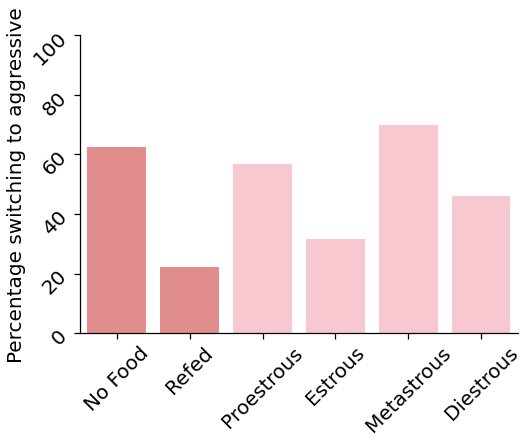

In [7]:

g = sns.catplot(x = 'State', 
                y = 'Percentage switching to aggressive',
                kind = 'bar', 
                data = present,
                order = pre_dict.keys(),
                palette = ['lightcoral', 'lightcoral', 'pink', 'pink', 'pink', 'pink'],
                aspect = 7/5)
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20, rotation = 45)
plt.ylabel('Percentage switching to aggressive', fontsize = 20)
plt.xlabel('')
plt.ylim([0, 100])

# Environmental Factors for NPS Probability

In [8]:
bootstrap_sample = {}
sample = {}

for con in exp_conds:
    if con == 'food_deprivation':
        con_data = data[data['exp_cond'] == con][data['exp_time'] == 1][data['target'] == 'cricket']
        con_data = con_data[con_data['exp_time'] == 1]
        con_data_binary = np.where(con_data.state_after.values == 'Agg+', 1, 0)
        bootstrap_sample[con] = bootstrap(con_data_binary)
        sample[con] = [len(con_data[con_data.state_after =='Agg+']),
                      len(con_data[con_data.state_after =='Agg-'])]
    else:
        con_data = data[data['exp_cond'] == con][data['exp_time'] == 1][data['target'] == 'pup']
        con_data = con_data[con_data['exp_time'] == 1]
        con_data_binary = np.where(con_data.state_after.values == 'Agg+', 1, 0)
        bootstrap_sample[con] = bootstrap(con_data_binary)
        sample[con] = [len(con_data[con_data.state_after =='Agg+']),
                      len(con_data[con_data.state_after =='Agg-'])]

/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## stats comparing proportion of Agg+ mice experiencing different environmental conditions

In [9]:
itertool_stats(sample, 'fisher')

('all_stressor_5h', 'all_stressor_2h') 0.07907585751171708
('all_stressor_5h', 'food_deprivation') 1.0
('all_stressor_5h', 'water_deprivation') 0.009495955652908117
('all_stressor_5h', 'light_cycle_disturbed') 0.003015900956404384
('all_stressor_5h', 'novel_env') 0.0038949608743659063
('all_stressor_5h', 'all_stressor_plus_food') 0.009495955652908117
('all_stressor_2h', 'food_deprivation') 0.03347242787275091
('all_stressor_2h', 'water_deprivation') 1.0
('all_stressor_2h', 'light_cycle_disturbed') 0.4210526315789468
('all_stressor_2h', 'novel_env') 0.44444444444444486
('all_stressor_2h', 'all_stressor_plus_food') 1.0
('food_deprivation', 'water_deprivation') 0.00642853355196875
('food_deprivation', 'light_cycle_disturbed') 0.0010548481944362927
('food_deprivation', 'novel_env') 0.0025545325585707777
('food_deprivation', 'all_stressor_plus_food') 0.00642853355196875
('water_deprivation', 'light_cycle_disturbed') 1.0
('water_deprivation', 'novel_env') 1.0
('water_deprivation', 'all_stres

## visualization of environmental condition based probability of mice turning to be aggressive

In [10]:
# compute agg proportion for each condition
agg_plus_proportion = {}
agg_minus_proportion = {}
ns = {}

for con in exp_conds:
    if con == 'all_stressor_2h':
        pass
    elif con == 'food_deprivation':
        con_data = data[data['exp_cond'] == con][data['exp_time'] == 1][data['target'] == 'cricket']
        ns[con] = len(con_data)
        row_count = len(con_data)
        agg_count = len(con_data[con_data['state_after'] == 'Agg+']) 
        agg_plus_proportion[con] = agg_count / row_count * 100
        agg_minus_proportion[con] = 100 - agg_plus_proportion[con]
        
    else:
        con_data = data[data['exp_cond'] == con][data['exp_time'] == 1][data['target'] == 'pup']
        ns[con] = len(con_data)
        row_count = len(con_data)
        agg_count = len(con_data[con_data['state_after'] == 'Agg+']) 
        agg_plus_proportion[con] = agg_count / row_count * 100
        agg_minus_proportion[con] = 100 - agg_plus_proportion[con]

print(agg_plus_proportion)

{'all_stressor_5h': 56.25, 'food_deprivation': 62.5, 'water_deprivation': 0.0, 'light_cycle_disturbed': 0.0, 'novel_env': 0.0, 'all_stressor_plus_food': 0.0}


/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


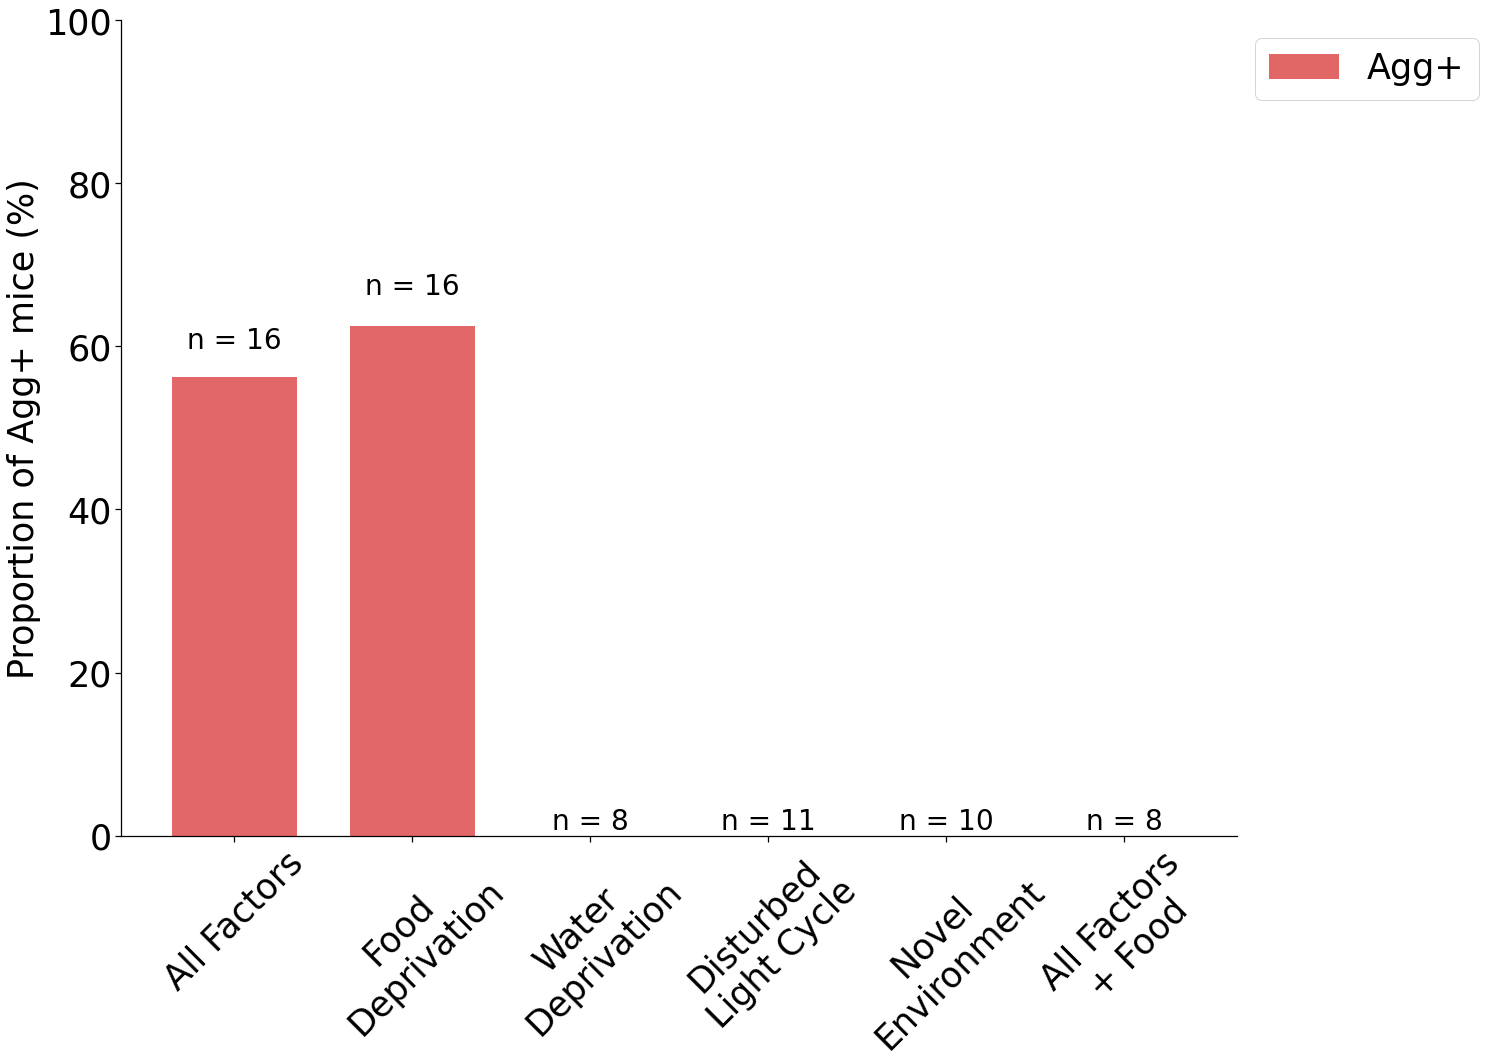

In [11]:
# plot agg+ and agg- proportion for each condition
fig , ax = plt.subplots(figsize = (20, 15))

#ax = plt.figure(figsize = (20, 15))
agg_plus = plt.bar(range(len(agg_plus_proportion)), list(agg_plus_proportion.values()),
        tick_label = list(agg_plus_proportion.keys()), align = 'center', 
        color = 'Tab:red', width = 0.7, alpha = 0.7)


plt.xlabel(None)
plt.ylabel('Proportion of Agg+ mice (%)', fontsize = 35)

plt.legend(['Agg+', 'Agg-'], bbox_to_anchor = (1, 1), 
           loc = 'upper left', fontsize = 35)

i = 0
for position in agg_plus:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(ns.values())[i]) ,ha='center', va='bottom', fontsize = 28)
    i += 1
    
    
locs, labels = plt.xticks()
plt.xticks(locs, ['All Factors', 'Food\nDeprivation', 'Water\nDeprivation', 
            'Disturbed\nLight Cycle', 'Novel\nEnvironment', 'All Factors\n+ Food'])
plt.xticks(fontsize = 35, rotation = 45)
plt.yticks(fontsize = 35)
plt.ylim([0, 100])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('hunger.jpg', dpi = 300)

# the effect of spontaneous state on NPS

## compute the probability of Agg+ mice depending on the spontaneous parental state

In [12]:
tar_data = data[data.target.isin(['pup', 'maze', 'intruder', 'cricket', 'cfos', 'refeeding_1h', 'refeeding_2h', 'openfield'])]
agg_cond_data = pd.concat([tar_data[tar_data['exp_cond'] == agg_conds[0]], 
                    tar_data[tar_data['exp_cond'] == agg_conds[1]]])
agg_cond_data_first = agg_cond_data[agg_cond_data['exp_time'] == 1]

con_spon_ig, n_ig = compute_conditional(agg_cond_data_first, 'Agg+','state_after', 'Parental-','state_before')
con_spon_parental, n_parental = compute_conditional(agg_cond_data_first, 'Agg+','state_after','Parental+','state_before')
n = [n_ig, n_parental]
print(n)
print(con_spon_ig, con_spon_parental)

[67, 66]
0.5671641791044776 0.48484848484848486


In [13]:
# stats to see whether the spontaneous state differentially affect the likelihood of being aggressive
spon_table = pd.crosstab(agg_cond_data_first.state_before, agg_cond_data_first.state_after)
spon_chi, spon_p, dof, expected = stats.chi2_contingency(spon_table)
print(spon_table)
print(spon_p)

state_after   Agg+  Agg-
state_before            
Parental+       32    34
Parental-       38    29
0.43719771112829564


(0.0, 1.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


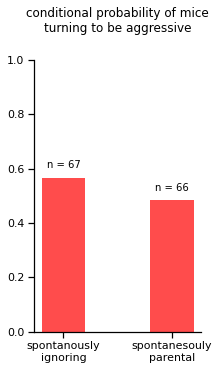

In [14]:
# plot the conditional probability of mice being aggressive given they are paretnal or ignoring
fig, ax = plt.subplots(figsize = (3,5))
cond = plt.bar(range(2), [con_spon_ig, con_spon_parental],
        tick_label = ('spontanously\nignoring', 'spontanesouly\nparental'),
        align = 'center', color = 'red', width = 0.4,alpha = 0.7)

i = 0
for position in cond:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(n)[i]) ,ha='center', va='bottom', fontsize = 10)
    i += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('conditional probability of mice\nturning to be aggressive',
         fontsize = 12, y = 1.08)
plt.ylim([0,1])

## linking spontaneous parental state to parental state after (if the mice are not aggressive)

In [15]:
agg_minus_data = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg-']
per = agg_minus_data['parental_state_after'].value_counts() / len(agg_cond_data_first)
p1, n = compute_conditional(agg_cond_data_first, 'Parental+', 'parental_state_after', 'Parental-', 'state_before')
p2, n = compute_conditional(agg_cond_data_first, 'Parental-', 'parental_state_after', 'Parental-', 'state_before')
p3, n = compute_conditional(agg_cond_data_first, 'Parental+', 'parental_state_after', 'Parental+', 'state_before')
p4, n = compute_conditional(agg_cond_data_first, 'Parental-', 'parental_state_after', 'Parental+', 'state_before')
print(('+, -',p1), ('- , -', p2), ('+, +', p3), ('-, +', p4))
print(per)

('+, -', 0.13432835820895522) ('- , -', 0.26865671641791045) ('+, +', 0.45454545454545453) ('-, +', 0.06060606060606061)
Parental+    0.293233
Parental-    0.165414
Name: parental_state_after, dtype: float64


Text(0, 0.5, 'retrieval latency')

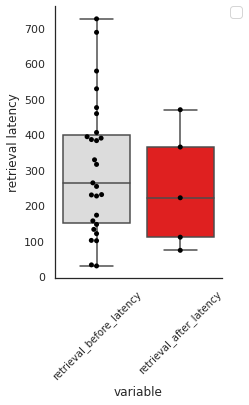

In [16]:
ret_latency_data = agg_cond_data_first.melt(id_vars = ['mice_ID', 'estrous_stage'],
                                            value_vars = ['retrieval_before_latency', 'retrieval_after_latency'])

sns.set(rc={'figure.figsize':(3,5)})
sns.set_style("white")
ax = category_plotting('variable','value',
                  None, ret_latency_data, 
                  order = ['retrieval_before_latency', 'retrieval_after_latency'])
plt.xticks(fontsize = 10, rotation = 45)
plt.ylabel('retrieval latency')

# Estrous stages and NPS Probability

In [17]:
# load hormone level data
hormone = pd.read_csv('hormone.csv')
hormone['P/E'] = hormone['end_dark_phase_progesterone(ng/ml)'] / hormone['max_estrogen_level(pg/ml)'] 

## impact of estrous cycle on the proportion of spontaneous parental and ignoring mice

In [18]:
est_spon_ig = {}
est_spon_parental = {}
n_spon_ig = {}
n_spon_parental = {}

data_est = tar_data[tar_data['exp_time'] == 1]

for estrous_stage in estrous_stages:
    est_data = data_est[data_est['estrous_stage'] == estrous_stage]
    est_data = est_data[est_data['exp_time'] == 1]
    est_spon_ig_data = est_data[est_data['state_before'] == 'Parental-']
    est_spon_parental_data = est_data[est_data['state_before'] == 'Parental+']
    est_spon_ig[estrous_stage] = len(est_spon_ig_data) / len(est_data)
    n_spon_ig[estrous_stage] = len(est_spon_ig_data)
    est_spon_parental[estrous_stage] = len(est_spon_parental_data) / len(est_data)
    n_spon_parental[estrous_stage] = len(est_spon_parental_data)
    

## plot proportion of mice being spontaneous parental or ignoring under different estrous cycle stage

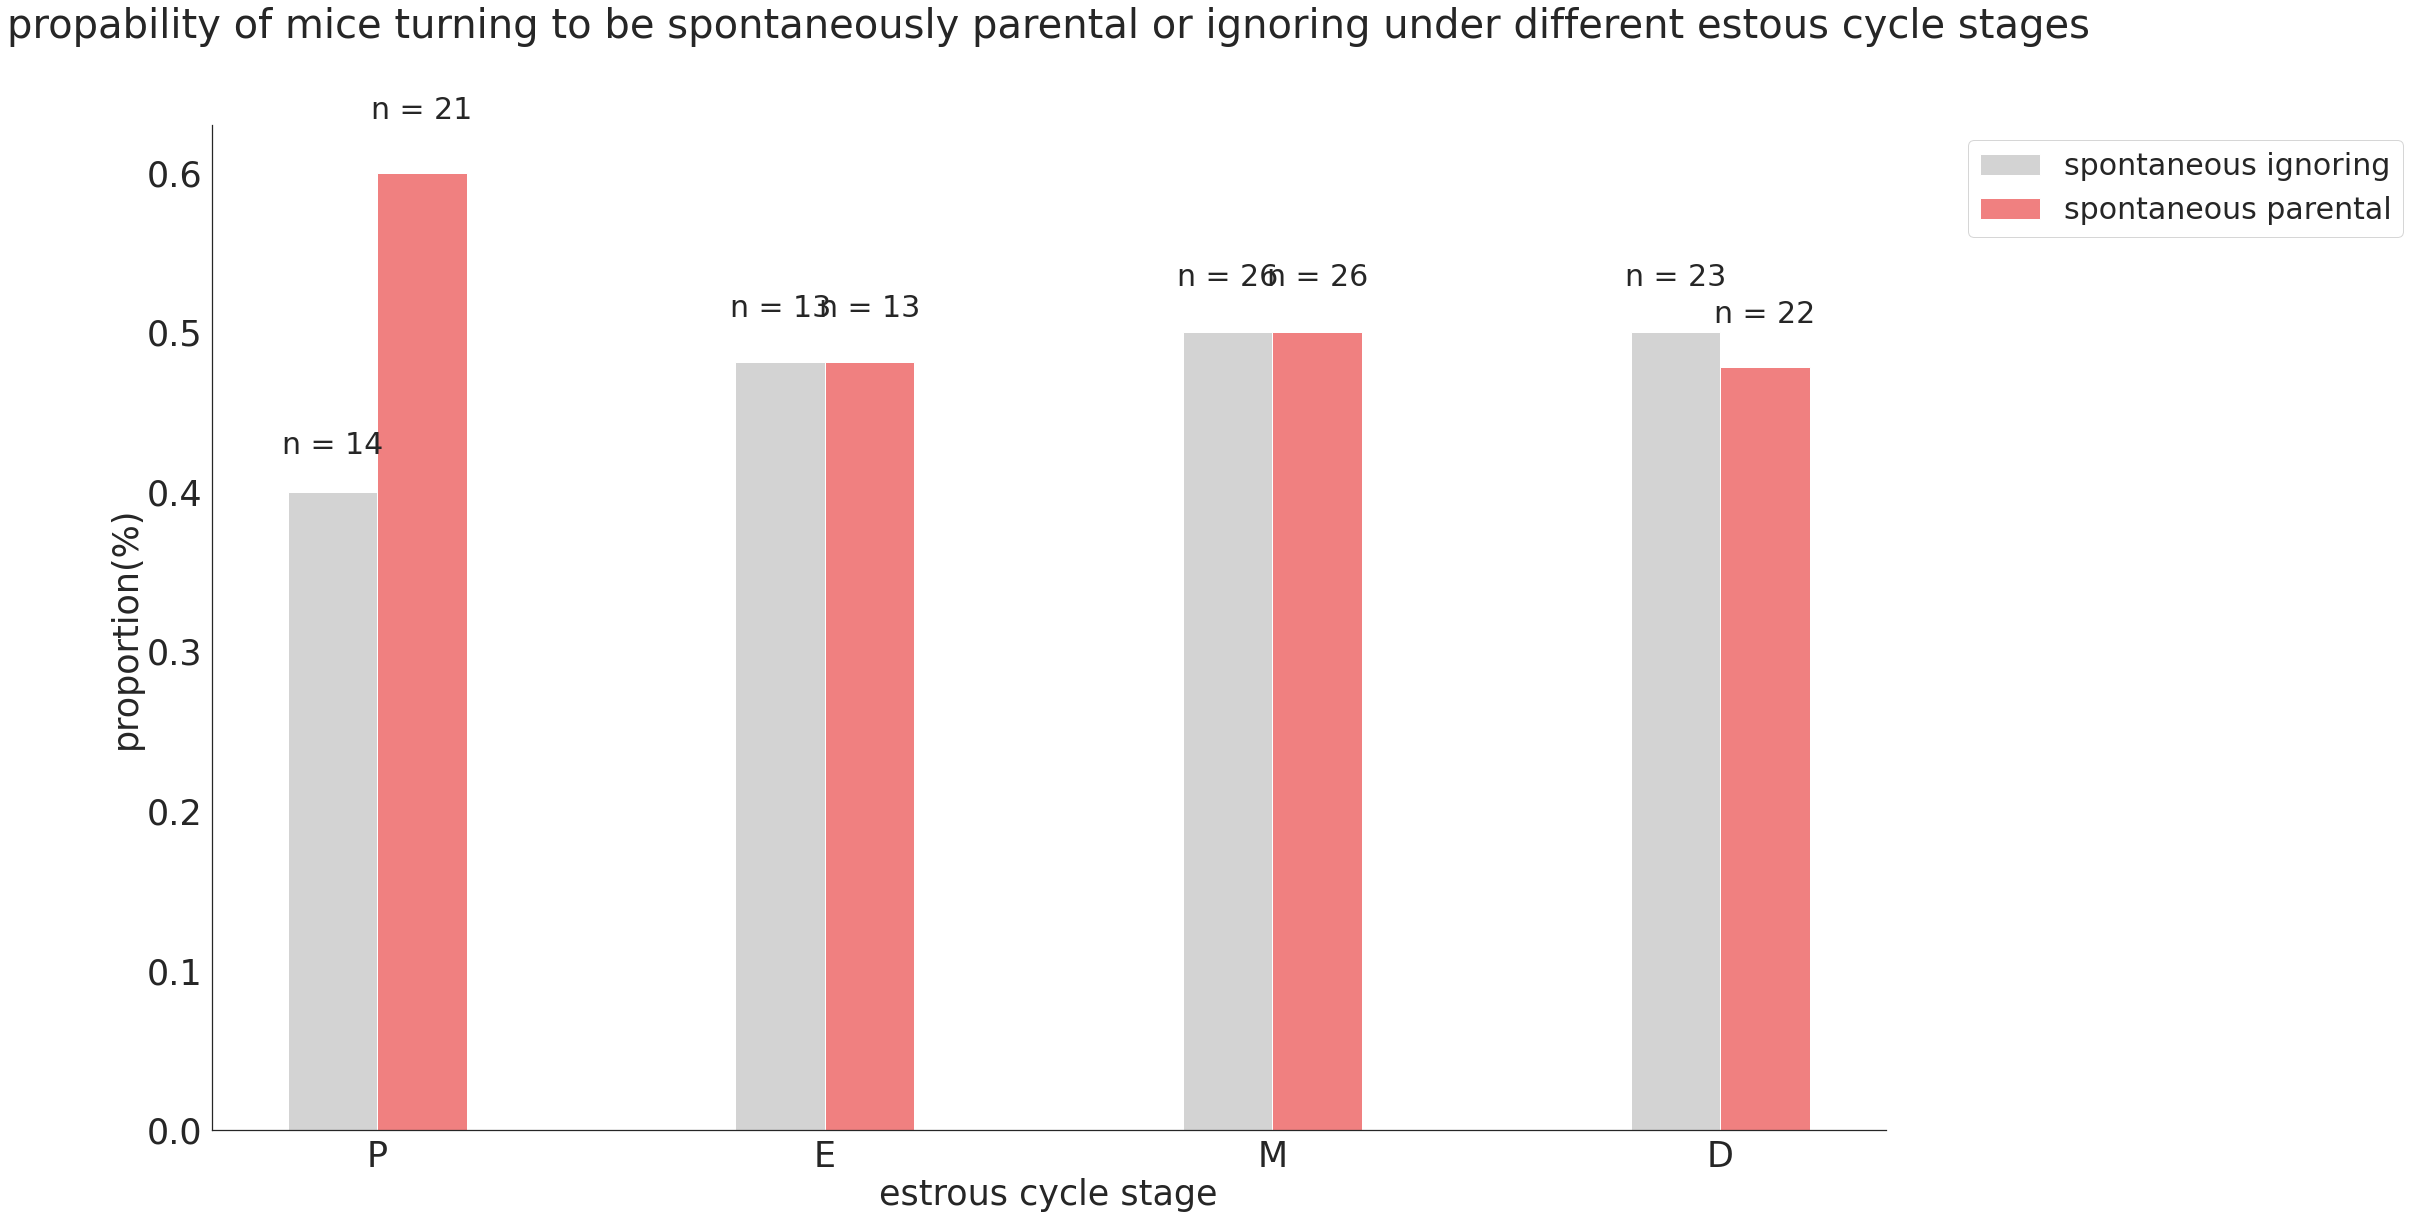

In [19]:
fig, ax = plt.subplots(figsize = (30, 18.5))
plt.rcParams['axes.facecolor'] = 'white'
w = 0.1
x = np.arange(len(est_spon_parental))

est_spon_ig_fig = ax.bar(x - w, list(est_spon_ig.values()),
                        align = 'center', color = 'lightgray', width = 0.2)
i = 0
for position in est_spon_ig_fig:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(n_spon_ig.values())[i]) ,ha='center', va='bottom', fontsize = 30)
    i += 1

    
est_spon_parental_fig = ax.bar(x + w, list(est_spon_parental.values()),
                            align = 'center', 
                            color = 'lightcoral', width = 0.2)
i = 0
for position in est_spon_parental_fig:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(n_spon_parental.values())[i]) ,ha='center', va='bottom', fontsize = 30)
    i += 1
    
    
ax.legend(['spontaneous ignoring', 'spontaneous parental'], bbox_to_anchor = (1.04, 1), 
           loc = 'upper left', fontsize = 30)
ax.set_xlabel('estrous cycle stage', fontsize = 35)
ax.set_ylabel('proportion(%)', fontsize = 35)
ax.set_title('propability of mice turning to be spontaneously parental or ignoring under different estous cycle stages',
         fontsize = 40, y = 1.08)

ax.set_xticks(x)
ax.set_xticklabels(list(est_spon_ig.keys()),fontsize = 35)  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis="y", labelsize = 35)

plt.show()

## impact of estrous cycle on the proportion of mice turning to be aggressive

In [20]:
estrous_data = {}
ns = {}
ns_spon_ig = {}
ns_spon_parental = {}
agg_latency = {}
est_con_spon_ig = {}
est_con_spon_parental = {}
len_agg = {}


for estrous_stage in estrous_stages:
    # proportion of mice turning to be aggressive at different estrous cycle stage
    est_data = agg_cond_data_first[agg_cond_data_first['estrous_stage'] == estrous_stage]
    est_data_agg = est_data[est_data['state_after'] == 'Agg+']
    union_p = est_data_agg[est_data_agg['state_before'] =='Parental+']
    union_m = est_data_agg[est_data_agg['state_before'] =='Parental-']
    
    len_agg[estrous_stage] = len(est_data_agg)
    est_data_agg_latency = est_data_agg['state_after_latency']
    est_prop = len(est_data_agg) / len(est_data) * 100
    estrous_data[estrous_stage] = est_prop
    ns[estrous_stage] = len(est_data)
    agg_latency[estrous_stage] = est_data_agg_latency
    
    # conditional propability of mice turning to be aggressivce at different estrous cycle stage
    est_con_spon_ig[estrous_stage] = compute_conditional(est_data, 'Agg+','state_after', 'Parental-', 'state_before')[0]
    ns_spon_ig[estrous_stage] = len(est_data[est_data['state_before'] == 'Parental-'])
    est_con_spon_parental[estrous_stage] = compute_conditional(est_data, 'Agg+','state_after', 'Parental+','state_before')[0]
    ns_spon_parental[estrous_stage] = len(est_data[est_data['state_before'] == 'Parental+'])

print(estrous_data)
print(est_con_spon_ig)
print(est_con_spon_parental) 
print(ns) 

{'P': 56.666666666666664, 'E': 31.57894736842105, 'M': 70.0, 'D': 45.94594594594595}
{'P': 0.6923076923076923, 'E': 0.6, 'M': 0.6818181818181818, 'D': 0.42105263157894735}
{'P': 0.47058823529411764, 'E': 0.0, 'M': 0.7222222222222222, 'D': 0.5}
{'P': 30, 'E': 19, 'M': 40, 'D': 37}


## infer statistical power

In [21]:
for subset in itertools.combinations(estrous_data.keys(), 2):
    stat, p, dof, expected  = stats.chi2_contingency([[len_agg[subset[0]], ns[subset[0]] - len_agg[subset[0]]],
                                        [len_agg[subset[1]], ns[subset[1]] - len_agg[subset[1]]]])
    print(subset, p)

('P', 'E') 0.1553792659131704
('P', 'M') 0.36806550630548474
('P', 'D') 0.530585360727371
('E', 'M') 0.012119552049891789
('E', 'D') 0.454546665752126
('M', 'D') 0.05633523486814524


In [22]:
est_hor = hormone
est_hor = est_hor.set_index('stage')
est_hor = est_hor.loc[['P', 'E', 'M', 'D']]

## plot proportion turning to be aggressive vs estrous stages

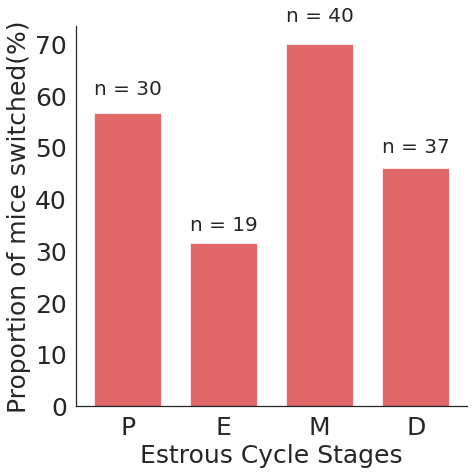

In [23]:
fig, ax = plt.subplots(figsize = (7, 7))
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.bar(range(len(estrous_data)), list(estrous_data.values()),
        tick_label = list(estrous_data.keys()), align = 'center', 
        color = 'Tab:red', width = 0.7, alpha = 0.7)

plt.xlabel('Estrous Cycle Stages', fontsize = 25)
plt.ylabel('Proportion of mice switched(%)', fontsize = 25)
#plt.title('Proportion of mice switched in different estous cycle stages',
#         fontsize = 40, y = 1.08)

i = 0
for position in fig:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(ns.values())[i]) ,ha='center', va='bottom', fontsize = 20)
    i += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)


# ax2 = plt.twinx()
# ax2.plot(['P', 'E', 'M', 'D'], est_hor['P/E'][:4], color = 'r', linewidth = 5)
# ax2.spines['top'].set_visible(False)
# ax2.set_ylim([0,9])
# plt.yticks(fontsize = 25)
# plt.ylabel('Progesterone / estrodiol ratio *10^-3', fontsize = 25)

plt.savefig('estrous_cycle.jpg', dpi = 300)

## plot conditional probability of mice turning to be aggressivce 

In [24]:
for stage in estrous_stages:
    est_data = agg_cond_data_first[agg_cond_data_first['estrous_stage'] == stage]
    tab = pd.crosstab(est_data.state_before, est_data.state_after)
    odds, p  = stats.fisher_exact(tab)
    print(stage, p)

P 0.282756666779392
E 0.010835913312693502
M 1.0
D 0.7458545854734879


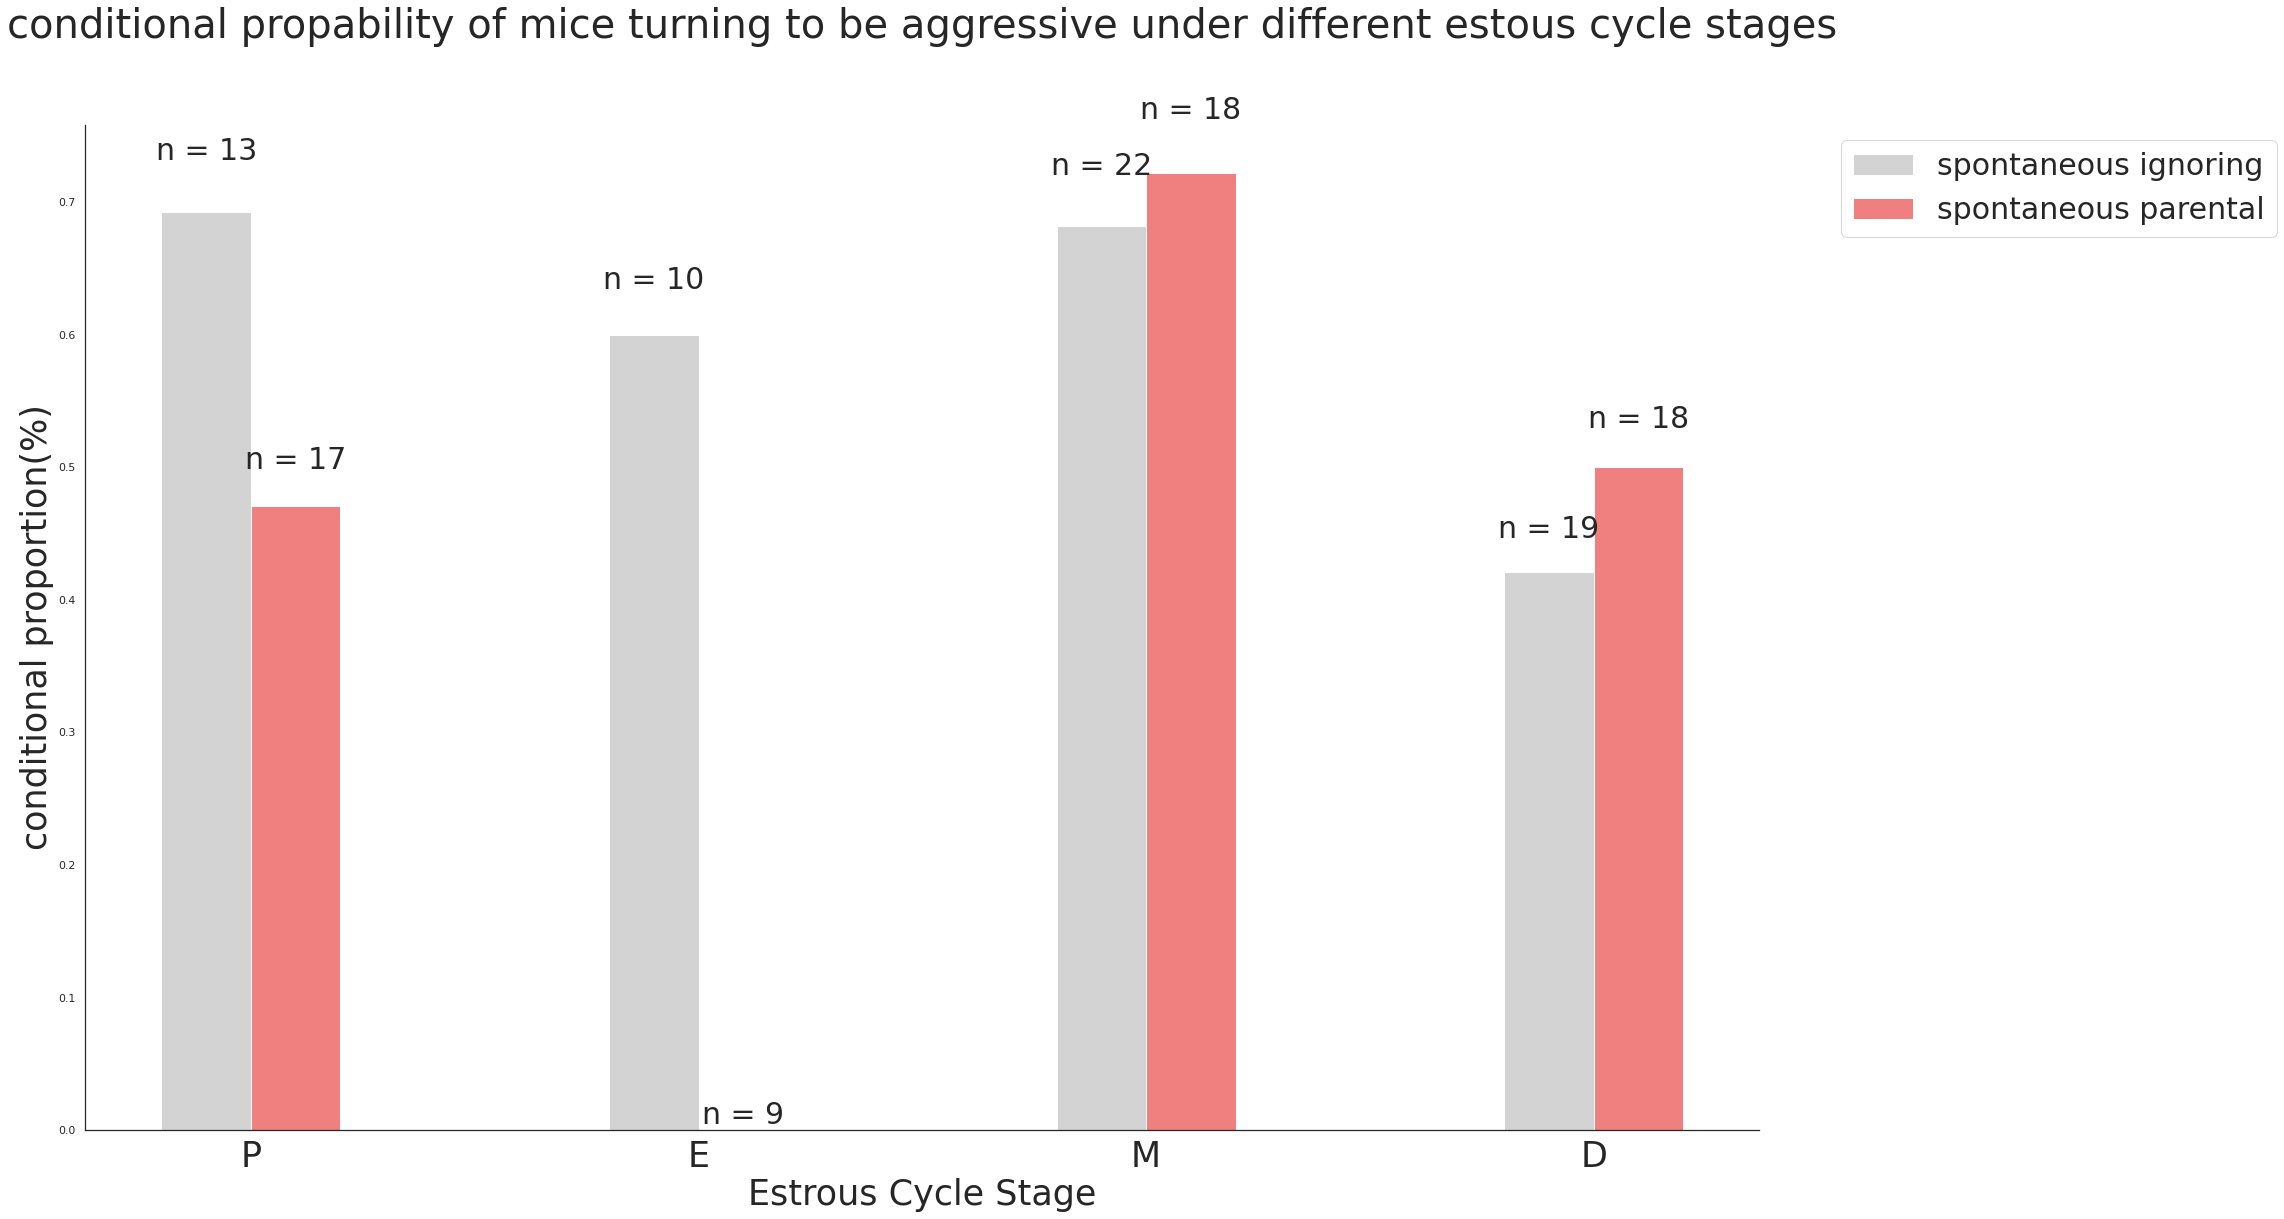

In [25]:
fig, ax = plt.subplots(figsize = (30, 18.5))
plt.rcParams['axes.facecolor'] = 'white'
w = 0.1
x = np.arange(len(est_con_spon_parental))

est_con_spon_ig_fig = ax.bar(x - w, list(est_con_spon_ig.values()),
                              align = 'center', color = 'lightgray', width = 0.2)
i = 0
for position in est_con_spon_ig_fig:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(ns_spon_ig.values())[i]) ,ha='center', va='bottom', fontsize = 30)
    i += 1

    
est_con_spon_parental_fig = ax.bar(x + w, list(est_con_spon_parental.values()),
                            align = 'center', color = 'lightcoral', width = 0.2)
i = 0
for position in est_con_spon_parental_fig:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(ns_spon_parental.values())[i]) ,ha='center', va='bottom', fontsize = 30)
    i += 1
    
    
ax.legend(['spontaneous ignoring', 'spontaneous parental'], bbox_to_anchor = (1.04, 1), 
           loc = 'upper left', fontsize = 30)
ax.set_xlabel('Estrous Cycle Stage', fontsize = 35)
ax.set_ylabel('conditional proportion(%)', fontsize = 35)
ax.set_title('conditional propability of mice turning to be aggressive under different estous cycle stages',
         fontsize = 40, y = 1.08)

ax.set_xticks(x)
ax.set_xticklabels(list(est_con_spon_ig.keys()),fontsize = 35)
#ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],fontsize = 35)  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [26]:
tab_agg_latency = {}
for i in estrous_stages:
    tab_agg_latency[i] = agg_cond_data_first[agg_cond_data_first['estrous_stage'] == i]['state_after_latency'].dropna()

itertool_stats(tab_agg_latency, 'ttest')

('P', 'E') 0.6630991803989916
('P', 'M') 0.6573909173169192
('P', 'D') 0.5017855340552402
('E', 'M') 0.8035990614731735
('E', 'D') 0.9161957718691655
('M', 'D') 0.7693419187299396


## plot aggression latency vs estrous stages

(array([0, 1, 2, 3]),
 [Text(0, 0, 'P'), Text(1, 0, 'E'), Text(2, 0, 'M'), Text(3, 0, 'D')])

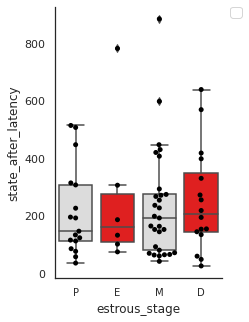

In [27]:
sns.set(rc={'figure.figsize':(3,5)})
sns.set_style("white")
ax = category_plotting('estrous_stage', 
                  'state_after_latency',
                  None, 
                  agg_cond_data_first, 
                  estrous_stages)

plt.xticks(fontsize = 10)


## plot aggression latency versus spontaneous parental & ignoring

(array([0, 1, 2, 3]),
 [Text(0, 0, 'P'), Text(1, 0, 'E'), Text(2, 0, 'M'), Text(3, 0, 'D')])

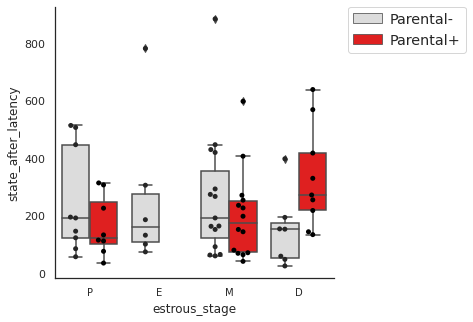

In [28]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
ax = category_plotting('estrous_stage', 
                  'state_after_latency',
                  'state_before', 
                  agg_cond_data_first, 
                  estrous_stages)
plt.xticks(fontsize = 10)

# Relationship between P/E level and swiching probability 

## fit a function to the P/E curve

In [29]:
from scipy.optimize import curve_fit
from scipy.special import logit

# define function to be fitted 
def func(x, a,c,d):
    return a* np.log(x/(1-x)+c) + d

In [30]:
# initialise dataframe
hormone = pd.read_csv('hormone.csv')
hormone['P/E'] = hormone['end_dark_phase_progesterone(ng/ml)'] / hormone['max_estrogen_level(pg/ml)'] 

hormone['switching probability'] = hormone['switching probability'] *0.01
hormone['P/E* 10^-3'] = hormone['P/E* 10^-3'] *0.1

# curve fitting
x = hormone['P/E* 10^-3']
y = hormone['switching probability']
popt, pcov = curve_fit(func, x, y)

# calculate the R2 score to evaluate the goodness of curve fitting
residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)
print(*popt)

0.9879069900461817
0.06394775938334597 -0.0861073171310471 0.5640142892115229


/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


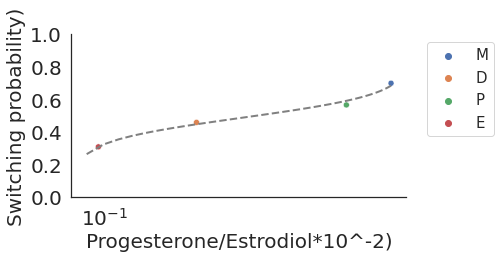

In [31]:
fig, ax = plt.subplots(figsize = (6,3))
plt.rcParams['axes.facecolor'] = 'white'

#reset the hormone dataframe

sns.scatterplot(data=hormone, x='P/E* 10^-3', y='switching probability', hue = 'stage')

plot_x = np.linspace(x.min()-0.4, x.max(), 100)
plt.plot(plot_x, func(plot_x, *popt), 
         linewidth = 2,
         linestyle = 'dashed',
         color = 'gray')


plt.xscale("log")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([0,1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend( bbox_to_anchor = (1.04, 1), 
           loc = 'upper left', fontsize = 15)
ax.set_xlabel('Progesterone/Estrodiol*10^-2)',fontsize = 20)
ax.set_ylabel('Switching probability)',fontsize = 20)
plt.savefig('hormone_ratio.jpg', dpi = 300,bbox_inches='tight')

In [32]:
z = func(0.075, *popt)
print(z)

nan


/home/tochenan/.conda/envs/dlc-ubuntu-CPU/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


## Receptor expression in MPOA and Arcuate 

In [33]:
import pathlib
path = '/receptor_level/'

df1 = pd.read_csv(str(pathlib.Path().resolve()) + path+'df_166-3.csv')
df2 = pd.read_csv(str(pathlib.Path().resolve()) + path+'df_167-3.csv')

df = pd.concat([df1,df2])
average = df[['% Esr1','% PR']].mean()


df = df[df['Unnamed: 0'].isin(['MPO', 'MPN','PD', 'ADP','PS', 'ARH'])]

df = df.replace({'Unnamed: 0':{'ARH':'ARC'}})

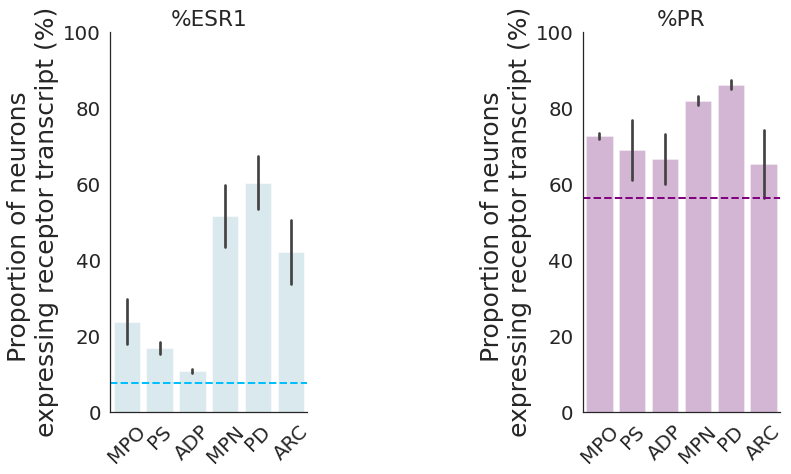

In [34]:
fig = plt.figure(figsize = (12,7))
sns.set(font_scale=1.8)
sns.set_style("white")
ax1 = fig.add_subplot(131)

g = sns.barplot(x = 'Unnamed: 0', 
            y = '% Esr1',
            data = df,
            alpha=.5, 
            palette=["lightblue"])

g.axhline(average['% Esr1'], 
          color = 'deepskyblue',
          linewidth=2,
          linestyle = 'dashed')

plt.ylim([0,100])
plt.title('%ESR1')
ax1.set_xlabel('')
ax1.set_ylabel('Proportion of neurons \nexpressing receptor transcript (%)',fontsize = 25)
sns.despine()
plt.xticks(rotation=45)

plt.savefig('estrogen_proportion', dpi = 300)

ax2 = plt.subplot(133)

g2 =sns.barplot(x = 'Unnamed: 0', 
            y = '% PR',
            data = df,
            alpha=0.3, 
            palette=["purple"])

g2.axhline(average['% PR'], 
           color = 'purple',
           linewidth=2,
           linestyle = 'dashed')

plt.ylim([0,100])
ax2.set_xlabel('')
ax2.set_ylabel('Proportion of neurons \nexpressing receptor transcript (%)',fontsize = 25)

plt.title('%PR')
sns.despine()
plt.xticks(rotation=45)
plt.savefig('progesterone_proportion', dpi = 300)

# Pregnancy stage and NPS probability

initialize pregnancy stages and extract data

pre state analysis

In [35]:
preg_stages_pre = ['PD2', 'PD2_pre', 'PD10', 'PD18']
preg_stages = ['PD2','PD10', 'PD18']
preg_data = data[data.target.isin(preg_stages)]

In [36]:
preg_data_pre = data[data.target.isin(preg_stages_pre)]
preg_data_pre = preg_data_pre.replace('PD2_pre', 'PD2')
preg_data_pre_count = preg_data_pre.groupby(['target']).size().reset_index(name='count')
preg_data_pre = preg_data_pre.groupby(['state_before','target']).size().reset_index(name = 'n')
preg_data_pre = preg_data_pre.merge(preg_data_pre_count, how = 'outer', on = 'target')
preg_data_pre['percent'] = preg_data_pre['n'] / preg_data_pre['count']
preg_data_pre['target'] = pd.Categorical(preg_data_pre['target'], ['PD2', 'PD10', 'PD18'])

preg_data_pre = preg_data_pre.sort_values(by = ['target'])
print(preg_data_pre)

  state_before target  n  count  percent
4    Parental+    PD2  5      8    0.625
5    Parental-    PD2  3      8    0.375
0    Parental+   PD10  6      8    0.750
1    Parental-   PD10  2      8    0.250
2    Parental+   PD18  7      8    0.875
3    Parental-   PD18  1      8    0.125


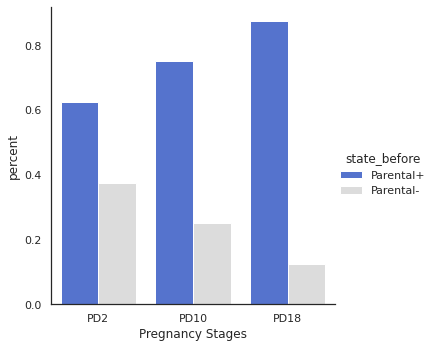

In [37]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style("white")
g = sns.catplot(x = 'target', 
                y = 'percent', 
                hue = 'state_before', 
                kind = 'bar', 
                data = preg_data_pre,
                palette = ['royalblue', 'gainsboro'])
g.set(xlabel = 'Pregnancy Stages')

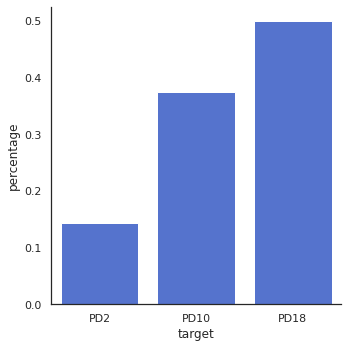

In [38]:
ret_per = preg_data.groupby('target')['retrieval_before_latency'].apply(lambda x: x.notnull().mean()).reset_index(name = 'percentage')

sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
g = sns.catplot(x = 'target', 
                y = 'percentage',
                kind = 'bar', 
                data = ret_per,
                order = preg_stages,
                palette = ['royalblue'])

post state analysis

In [39]:
preg_data_post_count = preg_data.groupby(['target']).size().reset_index(name='count')
preg_data_post = preg_data.groupby(['state_after','target']).size().reset_index(name = 'n')
preg_data_post = preg_data_post.merge(preg_data_post_count, how = 'outer', on = 'target')
preg_data_post['percent'] = preg_data_post['n'] / preg_data_post['count']
preg_data_post['target'] = pd.Categorical(preg_data_post['target'], ['PD2', 'PD10', 'PD18'])

preg_data_post = preg_data_post.sort_values(by = ['target'])
print(preg_data_post)

  state_after target  n  count   percent
4        Agg+    PD2  3      7  0.428571
5        Agg-    PD2  4      7  0.571429
0        Agg+   PD10  3      8  0.375000
1        Agg-   PD10  5      8  0.625000
2        Agg+   PD18  1      8  0.125000
3        Agg-   PD18  7      8  0.875000


In [40]:
preg_hor = hormone
preg_hor = preg_hor.set_index('stage')
preg_hor = preg_hor.loc[['PD2', 'PD10', 'PD18']]

KeyError: "None of [Index(['PD2', 'PD10', 'PD18'], dtype='object', name='stage')] are in the [index]"

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("white")
g = sns.catplot(x = 'target', 
                y = 'percent', 
                hue = 'state_after', 
                kind = 'bar', 
                data = preg_data_post,
                palette = ['red', 'gainsboro'],
                aspect = 20/15, alpha = 0.7)
g.set(xlabel = 'Pregnancy Stages')

ax = plt.gca()
ax.set_ylabel('Proportion of mice switched (%)')
ax2 = ax.twinx()
ax2.set_ylabel('Progesterone / estrodiol ratio *10^-3')
ax2.plot(['PD2', 'PD10', 'PD18'], preg_hor['P/E'], color = 'r', linewidth = 2)

ax2.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), ncol=1)
ax2.set_ylim([0,9])
preg_n = preg_data_post.sort_values(by = ['state_after'])
autolabel(g, preg_n['n'].tolist())
sns.despine(top = True, right = False)

In [ ]:
preg_cond_ig = {}
preg_cond_parental = {}

preg_data = data[data.target.isin(['PD2', 'PD10', 'PD18'])]

for preg_stage in preg_stages:
    preg_stage_data = preg_data[preg_data['target'] == preg_stage]
    preg_cond_ig[preg_stage], _ = compute_conditional(preg_stage_data, 'Agg+','state_after', 'Parental-','state_before')
    preg_cond_parental[preg_stage], _ = compute_conditional(preg_stage_data, 'Agg+','state_after','Parental+','state_before')

print(preg_cond_ig)
print(preg_cond_parental)

# Receptor KO and NPS

In [42]:
from scipy.stats import binom
from poibin import PoiBin

def binomial_range(data, estrous_data):
    ps = []
    
    for i in data['estrous_stage'].unique():
        n = int(data[data['estrous_stage'] == i]['estrous_count'])
        p = estrous_data[i] *0.01
        p = [p] * n
        
        ps.extend(p)
    
    # produce and return a poisson binomial pmf based on list of means from estrous cycle stages
    pb = PoiBin(ps)
    x = np.arange(0, int(data['estrous_count'].sum()))
    dist = pb.cdf(x)
    pmf = pb.pmf(x)

    # get mean of the distibution
    mean = int(np.where(pmf == pmf.max())[0]) # most probable value
    std = np.sqrt(np.sum([i*j for i, j in zip([1-p for p in ps] ,ps)]))
    mean_t  = np.sum(ps) # mean of the distribution
    
    # get the 0.05 interval 
    lower = mean_t - 2* std
    #lower = np.where(dist > 0.05)[0][0] # using distribution
    
    # get the 0.95 confidence interval
    higher = mean_t + 2 * std
    #higher = np.where(dist < 0.95)[0][-1] # using distribution
    
    
    return lower, higher, mean
       

In [43]:
KO_dat = pd.read_csv('../NPW_hormone/receptor_KO/receptorKO.csv')

viruses = ['EGFP-CRE', 'EGFP']
areas = ['MPOA', 'ARC']
receptors = ['PR', 'ESR']

KO_dat = KO_dat[(KO_dat.injection_site.isin(areas)) &
                (KO_dat.validation != 'invalid')&
                (KO_dat.state_after!= 'invalid')]

KO_count = KO_dat.groupby(['KO', 'injection_site', 'virus', 'state_after']).size().reset_index(name='count')
KO_n = KO_dat.groupby(['KO','injection_site', 'virus']).size().reset_index(name = 'n')
KO_count = KO_count[KO_count.virus == 'EGFP-CRE']
KO_n = KO_n[KO_n.virus == 'EGFP-CRE']

c_count = KO_dat.groupby(['injection_site', 'virus', 'state_after']).size().reset_index(name='count')
c_n = KO_dat.groupby(['injection_site', 'virus']).size().reset_index(name = 'n')
c_count = c_count[c_count.virus == 'EGFP']
c_n = c_n[c_n.virus == 'EGFP']

KO_n = pd.concat([KO_n,c_n])
KO_count = pd.concat([KO_count, c_count])

In [44]:
# calculate predicted probability of switching based on the number of animals in different estrous cycle stages
KO_probability = KO_dat.groupby(['KO', 'injection_site', 'virus', 'estrous_stage']).size().reset_index(name = 'estrous_count')
KO_probability = KO_probability[KO_probability.virus == 'EGFP-CRE']
c_probability = KO_dat.groupby(['injection_site', 'virus', 'estrous_stage']).size().reset_index(name = 'estrous_count')
c_probability = c_probability[c_probability.virus == 'EGFP']
KO_probability = pd.concat([KO_probability, c_probability])

for KO in receptors:
    for area in areas:
        for virus in viruses:

            
            if virus == 'EGFP-CRE':
            
                KO_est = KO_probability[(KO_probability.injection_site == area) &
                                        (KO_probability.KO == KO)&
                                        (KO_probability.virus == virus)]
                if KO_est.empty:
                    continue
                    
                else:
                    cond = ((KO_probability.injection_site == area) &
                            (KO_probability.KO == KO)&
                            (KO_probability.virus == virus))
                            
                    lower, higher, mean = binomial_range(KO_est, estrous_data)

                    KO_probability.loc[cond, 'lower'] = lower
                    KO_probability.loc[cond, 'higher'] = higher
                    KO_probability.loc[cond, 'mean'] = mean
                    
                    
            else:
                KO_est = KO_probability[(KO_probability.injection_site == area) &
                                        (KO_probability.virus == virus)]
                if KO_est.empty:
                    continue
                    
                else:
                    cond = ((KO_probability.injection_site == area) &
                            (KO_probability.virus == virus))
                            
                    lower, higher, mean = binomial_range(KO_est, estrous_data)


                    KO_probability.loc[cond, 'lower'] = lower
                    KO_probability.loc[cond, 'higher'] = higher
                    KO_probability.loc[cond, 'mean'] = mean
                

KO_probability.pop('estrous_stage')
KO_probability.pop('estrous_count')
KO_probability = KO_probability.drop_duplicates()

KO_dat = KO_n.merge(KO_count, how = 'outer', on = ['KO', 'injection_site', 'virus'])
KO_dat = KO_dat.merge(KO_probability, how = 'outer', on = ['KO', 'injection_site', 'virus'])
KO_dat['percent'] = KO_dat['count'] / KO_dat['n'] *100
KO_dat['mean'] = KO_dat['mean'] / KO_dat['n'] *100
KO_dat['lower'] = KO_dat['lower'] / KO_dat['n'] *100
KO_dat['higher'] = KO_dat['higher'] / KO_dat['n'] *100

print(KO_dat)

    KO injection_site     virus   n state_after  count      lower     higher  \
0  ESR            ARC  EGFP-CRE  12        Agg+      6  26.464592  81.426984   
1  ESR            ARC  EGFP-CRE  12        Agg-      6  26.464592  81.426984   
2  ESR           MPOA  EGFP-CRE  10        Agg+     10  17.139915  77.897543   
3   PR            ARC  EGFP-CRE  13        Agg+      8  27.445132  81.024066   
4   PR            ARC  EGFP-CRE  13        Agg-      5  27.445132  81.024066   
5   PR           MPOA  EGFP-CRE  11        Agg+      3  24.809263  82.775547   
6   PR           MPOA  EGFP-CRE  11        Agg-      8  24.809263  82.775547   
7  NaN           MPOA      EGFP   8        Agg+      6  19.132554  86.296559   
8  NaN           MPOA      EGFP   8        Agg-      2  19.132554  86.296559   

        mean     percent  
0  58.333333   50.000000  
1  58.333333   50.000000  
2  50.000000  100.000000  
3  53.846154   61.538462  
4  53.846154   38.461538  
5  54.545455   27.272727  
6  54.5454

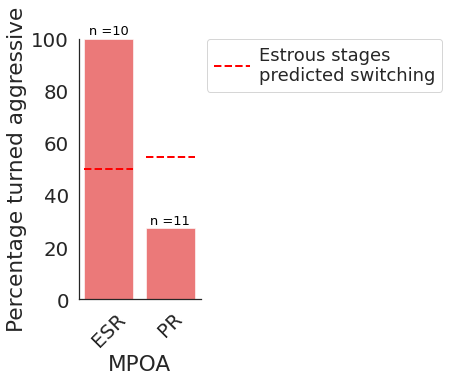

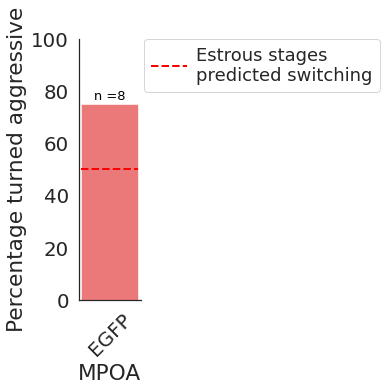

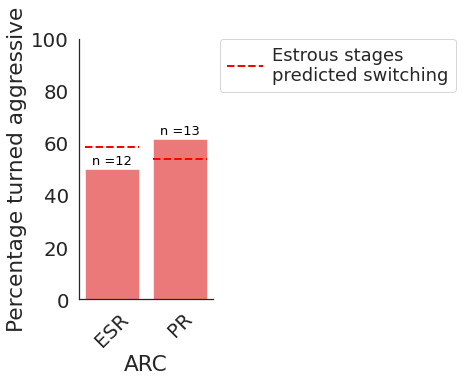

In [46]:
conds = ['EGFP-CRE', 'EGFP']


for area in areas:
    
    for cond in conds:
    
        KO = KO_dat[(KO_dat.injection_site == area)&
                    (KO_dat.virus == cond)]
        


        KO = KO[KO.state_after == 'Agg+']
        
        sns.set(rc={'figure.figsize':(12,7)})
        sns.set(font_scale=1.8)  
        sns.set_style("white")
        
        try:
        
            if cond == 'EGFP-CRE':  


                g = sns.catplot(x = 'KO',
                                y = 'percent', 
                                kind = 'bar', 
                                data = KO,
                                palette = ['red', 'red'],
                               aspect = 10/15, alpha = 0.6)

            else:


                g = sns.catplot(x = 'virus',
                                y = 'percent', 
                                kind = 'bar', 
                                data = KO,
                                palette = ['red'],
                                aspect = 7/15, alpha = 0.6)




            plt.ylim([0,100])
            autolabel(g, KO['n'].tolist())
            ax = plt.gca()
            ax.set_ylabel('Percentage turned aggressive')
            plt.xticks(rotation=45)


            # plot predicted switching probability based on estrous cycle the expriment mice are in
            xs = []

            for patch in ax.patches:

                width = patch.get_width()
                xs.append(patch.get_x())


            i = 0
            for x in xs:
                x_plot = np.linspace(x, x + width, 100)
                line = KO['mean'].iloc[i]
                y_plot = np.linspace(line,line,100)
               
                i = i +1
                plt.plot(x_plot,y_plot, linestyle = 'dashed', linewidth=2, color='red', 
                         label = 'Estrous stages\npredicted switching')
               
            
            handles, labels = ax.get_legend_handles_labels()

            lgd = ax.legend(handles[0:1], labels[0:1],
                            bbox_to_anchor=(1.05, 1), 
                            fontsize = 'small', 
                            loc=2, borderaxespad=0,
                            handletextpad = 0.5)


            g.set(xlabel = area)

            plt.savefig('output_figures/' + area + '_'+ cond + '_KO.png', dpi = 300)
            
        except ValueError:
            pass



# Food intake Analysis

compare baseline, Agg+ and Agg- food intake and run statistics

In [ ]:
food_intake = {}
food_intake['normal'] = agg_cond_data_first['1h_food_consumption_before'].dropna().tolist()
food_intake['Agg+'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg+']['1h_food_consumption_after'].dropna().tolist()
food_intake['Agg-'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg-']['1h_food_consumption_after'].dropna().tolist()
food_intake['food deprivation only'] = data[data['target'] == 'pup_absent']['1h_food_consumption_after']

e = []
for k,vs in food_intake.items():
    for v in vs:
        e.append(float(v))
    food_intake[k] = e
    e = []
     
stats1, p1 = stats.ttest_ind(food_intake['normal'],
                                food_intake['Agg+'],
                                equal_var = False)
stats2, p2 = stats.ttest_ind(food_intake['Agg+'],
                                food_intake['Agg-'],
                                equal_var = False)
stats3, p3 = stats.ttest_ind(food_intake['normal'],
                                food_intake['Agg-'],
                             equal_var = False)
stats4, p4 = stats.ttest_ind(food_intake['Agg+'],
                                food_intake['food deprivation only'],
                                equal_var = False)

stats5, p5 = stats.ttest_ind(food_intake['Agg-'],
                                food_intake['food deprivation only'],
                                equal_var = False)

food_intake_n = [len(value) for key, value in food_intake.items()]
print(food_intake_n)
print(p1, p2, p3, p4, p5)

plot food intake of baseline and that of Agg+ and Agg- mice after the state-changing period

In [ ]:
food_intake_plot = {}
max_value = {}
food_intake_plot['Baseline'] = agg_cond_data_first['1h_food_consumption_before']
food_intake_plot['Agg+'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg+']['1h_food_consumption_after']
food_intake_plot['Agg-'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg-']['1h_food_consumption_after']
food_intake_plot['Pup-'] = data[data['target'] == 'pup_absent']['1h_food_consumption_after']

for key in food_intake_plot.keys():
    max_value[key] = food_intake_plot[key].max()

food_intake_plot = pd.DataFrame.from_dict(food_intake_plot)
sns.set(rc={'figure.figsize':(5, 7)})
sns.set(font_scale=2)
ax = sns.boxplot(data = food_intake_plot, palette = ['moccasin', 'red', 'gainsboro'])
sns.despine()

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
sns.swarmplot(data = food_intake_plot, color = 'black')
ax.set(ylabel = 'Food Intake (g)')
plt.xticks(rotation=45)
ax.grid(False)


nobs = ["n = " + str(i) for i in food_intake_n]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            list(max_value.values())[tick] + 0.05,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='black')

In [ ]:
baseline = {}
max_value_baseline = {}
baseline['Agg+'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg+']['1h_food_consumption_before']
baseline['Agg-'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg-']['1h_food_consumption_before']
    
baseline_plot = pd.DataFrame.from_dict(baseline)
for key in baseline_plot.keys():
    max_value_baseline[key] = baseline_plot[key].max()
sns.set(rc={'figure.figsize':(4, 7)})
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.boxplot(data = baseline_plot, palette = ['red', 'gainsboro'])
sns.despine()

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
    
sns.swarmplot(data = baseline_plot, color = 'black')
ax.set(ylabel = 'Food Intake (g)')
plt.xticks(rotation=45)
ax.grid(False)

nobs = ["n = " + str(i) for i in food_intake_n[1:]]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            list(max_value_baseline.values())[tick] + 0.01,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='black')

compare baseline, post phase Agg+, Parental+ and Parental- mice food intake and run statistics

In [ ]:
food_intake_state_plot = {}
food_intake_state = {}

food_intake_state_plot['Agg+'] = agg_cond_data_first[agg_cond_data_first['state_after'] == 'Agg+']['1h_food_consumption_after']
food_intake_state_plot['Parental+'] = agg_cond_data_first[agg_cond_data_first['parental_state_after'] == 'Parental+']['1h_food_consumption_after']
food_intake_state_plot['Parental-'] = agg_cond_data_first[agg_cond_data_first['parental_state_after'] == 'Parental-']['1h_food_consumption_after']
food_intake_state['Agg+'] = food_intake_state_plot['Agg+'].dropna().tolist()
food_intake_state['Parental+'] = food_intake_state_plot['Parental+'].dropna().tolist()
food_intake_state['Parental-'] = food_intake_state_plot['Parental-'].dropna().tolist()


stats1, p1_s = stats.ttest_ind(food_intake_state['Agg+'],
                                food_intake_state['Parental+'],
                                equal_var = False)
stats2, p2_s = stats.ttest_ind(food_intake_state['Agg+'],
                                food_intake_state['Parental-'],
                                equal_var = False)
stats3, p3_s = stats.ttest_ind(food_intake_state['Parental+'],
                                food_intake_state['Parental-'],
                             equal_var = False)
print({key: len(value) for key, value in food_intake_state.items()})
print(p1_s, p2_s, p3_s)

visualise food intake of baseline and that of Agg+, Parental+ and Parental- mice after the state-changing period

In [ ]:
food_intake_state_plot = pd.DataFrame.from_dict(food_intake_state_plot)

sns.set(rc={'figure.figsize':(5, 7)})
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.boxplot(data = food_intake_state_plot)
sns.despine()
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.swarmplot(data = food_intake_state_plot, color = 'orange')
ax.set(ylabel = 'Food Intake(g)')
plt.xticks(rotation=45)
ax.grid(False)

plot food intake against spontanous state

In [ ]:
sns.set(rc={'figure.figsize':(3,5)})
sns.set_style("white")
ax = category_plotting('state_after','1h_food_consumption_after',
                   'state_before', agg_cond_data_first, None)

plt.xticks(fontsize = 10)

invesgate how estrous cycle affect the food intake before and after going through the state_changing period

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
ax = category_plotting('estrous_stage', '1h_food_consumption_before',
                 'state_after', agg_cond_data_first, estrous_stages)
plt.ylim(0, 1)
ax.set(xlabel = 'estrous cycle stage', ylabel = 'food intake(g)')

plt.title('food intake before the state changing period impacted by estrous stages')


ax = category_plotting('estrous_stage', '1h_food_consumption_after',
                 'state_after', agg_cond_data_first, estrous_stages)

ax.set(xlabel = 'estrous cycle stage', ylabel = 'food intake(g)')
plt.title('food intake after the state changing period impacted by estrous stages')

plotting correlation between food intake and attack latency

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")


sns.regplot(x = '1h_food_consumption_after',
            y = 'state_after_latency',
            data = agg_cond_data_first)

sns. scatterplot(data = agg_cond_data_first, 
                 x = '1h_food_consumption_after',
                 y = 'state_after_latency',
                hue = 'state_before')
sns.despine()

plot regression line fit for relation between attack latency and food consumption

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")

pos = sns.regplot(x = '1h_food_consumption_after',
            y = 'state_after_latency',
            data = agg_cond_data_first[agg_cond_data_first['state_before'] == 'Parental+'], label = 'Parental+')

neg = sns.regplot(x = '1h_food_consumption_after',
            y = 'state_after_latency',
            data = agg_cond_data_first[agg_cond_data_first['state_before'] == 'Parental-'], label = 'Parental-')

plt.legend()
sns.despine()

investigate how food intake differ between diferent pregnancy stage

In [ ]:
preg_food = data[data.target.isin(preg_stages)]
preg_food = preg_food.sort_values(by = 'state_after', ascending = False)
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
g1 = category_plotting('target', 
                      '1h_food_consumption_before',
                      'state_after', 
                      preg_food, 
                      preg_stages)

g1.set(xlabel = 'Pregnancy Stages')

g2 = category_plotting('target', 
                      '1h_food_consumption_after',
                      'state_after', 
                      preg_food, 
                      preg_stages)

g2.set(xlabel = 'Pregnancy Stages')

# Target Specificity Analysis

### Predation Test 

Data extraction and reindexing

In [ ]:
cricket_data = agg_cond_data_first[agg_cond_data_first['target'] == 'cricket']

cricket_data_before = cricket_data.groupby(['state_after','target_before']).size().reset_index(name = 'n')
cricket_data_count = cricket_data.groupby(['state_after']).size().reset_index(name='count')
cricket_data_before = cricket_data_before.merge(cricket_data_count, how = 'outer', on = 'state_after')
cricket_data_after = cricket_data.groupby(['state_after','target_after']).size().reset_index(name='n')
cricket_data_after = cricket_data_after.merge(cricket_data_count, how = 'outer', on = 'state_after')

cricket_data_before = cricket_data_before.rename(columns = {'target_before': 'target'})
cricket_data_after = cricket_data_after.rename(columns = {'target_after': 'target'})
cricket_data = pd.concat([cricket_data_before, cricket_data_after], keys = ['Pre', 'Post'])
cricket_data.reset_index(inplace = True)
cricket_data['percent'] = (cricket_data['n'] / cricket_data['count']) * 100

agg_plus_cricket = cricket_data[cricket_data['state_after'] == 'Agg+'].reset_index()
agg_minus_cricket = cricket_data[cricket_data['state_after'] == 'Agg-'].reset_index()

calculate statistics of pre and post phase cricket hunt probabilities

In [ ]:
plus_odds, plus_p = stats.fisher_exact([[agg_plus_cricket.n[0], agg_plus_cricket.n[1]],
                                        [agg_plus_cricket.n[2], agg_plus_cricket.n[3]]])

minus_odds, minus_p = stats.fisher_exact([[agg_minus_cricket.n[0], agg_minus_cricket.n[1]],
                                        [agg_minus_cricket.n[2], agg_minus_cricket.n[3]]])

print(plus_p, minus_p)

data visualisation

In [ ]:
cricket_data = cricket_data.rename(columns={'state_after': 'Post state'})
cricket_data = cricket_data[(cricket_data['Post state'] == 'Agg+')&
                            (cricket_data.target == 'Hunt+')]
cricket_data = cricket_data.sort_values(['Post state', 'target'], ascending=[False, False])


sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 1.5)
plt.rcParams['legend.title_fontsize'] = '18'
plt.rcParams['axes.titlepad'] = 25 
sns.set_style("white")

g = sns.catplot(x = 'level_0',
            y = 'percent', 
            hue = 'target',
            data = cricket_data,
            kind = 'bar', 
            palette=[ "red"],
            ci = True, alpha = 0.7, aspect = 4/5)

autolabel(g, cricket_data['count'].tolist())
g.set(xlabel = None)
g.set(ylabel = 'Proportion of Agg+ mice (%')
plt.ylim(0,100)
g._legend.set_title('cricket')
plt.savefig('cricket.jpg', dpi = 300)


### Instruder test
<br>
data extraction and reindexing

In [ ]:
intruder_data = agg_cond_data_first[agg_cond_data_first['target'] == 'intruder']
intruder_data_tb = intruder_data.groupby(['state_after', 'target_before']).size().reset_index(name='n')
intruder_data_ta = intruder_data.groupby(['state_after', 'target_after']).size().reset_index(name='n')
intruder_data_tb = intruder_data_tb.rename(columns = {'target_before': 'target'})
intruder_data_ta = intruder_data_ta.rename(columns = {'target_after': 'target'})
intruder_data_t = pd.concat([intruder_data_tb, intruder_data_ta], keys = ['Pre', 'Post'])
intruder_data_t.reset_index(inplace = True)
ls = intruder_data_t.columns.tolist()

Agg_t = pd.DataFrame([['Pre', '0', 'Agg+', 'Agg+', 0],
                     ['Post', '1', 'Agg+', 'Agg+', 0],
                     ['Pre', '0', 'Agg-', 'Agg+', 0],
                     ['Post', '1', 'Agg-', 'Agg+', 0]],
                     columns = ls)

intruder_data_t = intruder_data_t.append(Agg_t)

intruder_data_t2b = intruder_data.groupby(['state_after', 'target_2_before']).size().reset_index(name='n')
intruder_data_t2a = intruder_data.groupby(['state_after', 'target_2_after']).size().reset_index(name='n')
intruder_data_t2b = intruder_data_t2b.rename(columns = {'target_2_before': 'target'})
intruder_data_t2a = intruder_data_t2a.rename(columns = {'target_2_after': 'target'})
intruder_data_t2 = pd.concat([intruder_data_t2b, intruder_data_t2a], keys = ['Pre', 'Post'])
intruder_data_t2.reset_index(inplace = True)
Agg_t2 = pd.DataFrame([['Pre', '0', 'Agg+', 'Agg+', 0],
                     ['Post', '1', 'Agg+', 'Agg+', 0],
                     ['Pre', '0', 'Agg-', 'Agg+', 0],
                     ['Post', '1', 'Agg-', 'Agg+', 0]],
                     columns = ls)
intruder_data_t2 = intruder_data_t2.append(Agg_t2)


intruder_data_count = intruder_data.groupby(['state_after']).size().reset_index(name='count')
intruder_data_t = intruder_data_t.merge(intruder_data_count, how = 'outer', on = 'state_after')
intruder_data_t2 = intruder_data_t2.merge(intruder_data_count, how = 'outer', on = 'state_after')

intruder_data_t['percent'] = (intruder_data_t['n'] / intruder_data_t['count']) * 100
intruder_data_t2['percent'] = (intruder_data_t2['n'] / intruder_data_t2['count']) * 100

intruder test data visualization (male and female intruders)

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 1.5)
sns.set_style("white")
intruder_data_t = intruder_data_t.rename(columns={'state_after': 'Post state'})
intruder_data_t = intruder_data_t[(intruder_data_t['Post state'] == 'Agg+')&
                                  (intruder_data_t.target == 'Agg+')]



g1 = sns.catplot(x = 'level_0',
            y = 'percent', 
            hue = 'target',
            data = intruder_data_t,
            kind = 'bar', 
            palette=['red'],
            aspect = 4/5, alpha = 0.7)

autolabel(g1, intruder_data_t['count'].tolist())
g1.set(xlabel = None)
g1.set(ylabel = 'Proportion of Agg+ mice (%)')
plt.ylim([0,100])
g1._legend.set_title('Female\nIntruder')
plt.savefig('female intruder.jpg', dpi = 300)

intruder_data_t2 = intruder_data_t2.rename(columns={'state_after': 'Post state'})

intruder_data_t2 = intruder_data_t2.rename(columns={'state_after': 'Post state'})
intruder_data_t2 = intruder_data_t2[(intruder_data_t2['Post state'] == 'Agg+')&
                                   (intruder_data_t2.target == 'Agg+')]
g2 = sns.catplot(x = 'level_0',
            y = 'percent', 
            hue = 'target',
            data = intruder_data_t2,
            kind = 'bar', 
            palette=['red'],
            aspect = 4/5, legend_out = True,alpha = 0.7)

autolabel(g2, intruder_data_t2['count'].tolist())
g2.set(xlabel = None)
plt.ylim([0,100])
g2.set(ylabel = 'Proportion of Agg+ mice (%)')
g2._legend.set_title('Male\nIntruder')
plt.savefig('male intruder.jpg', dpi = 300)

# Elevated Plus Maze

extract and clean maze data from EthoVision output

In [ ]:
maze_data = pd.read_excel('Statistics-plus_maze_2601.xlsx', engine = 'openpyxl')
ID = ['BRAC5018.4d', 'BRAC5018.4e', 'BRAC5048.5c', 'BRAC5048.5d',
      'BRAC5048.5e', 'BRAC5081.3c', 'BRAC5081.3d', 'BRAC5081.3e',
      'BRAC5195.3c', 'BRAC5195.3d', 'BRAC5195.3e', 'BRAC5204.2h',
      'BRAC5081.3c', 'BRAC5018.4d', 'BRAC5018.4e', 'BRAC5048.5c',
      'BRAC5048.5d', 'BRAC5048.5e', 'BRAC5081.3d', 'BRAC5081.3e',
      'BRAC5195.3c', 'BRAC5195.3d', 'BRAC5195.3e', 'BRAC5204.2h',
      'BRAC5204.2i', 'BRAC5204.2j', 'BRAC5266.1f', 'BRAC5266.1g']

maze_data_0 = maze_data[maze_data['result'].isin(['Result 1', 'Result 1 (2)'])]
maze_data = maze_data.loc[maze_data['result'].isin(['Pre', 'Post'])]
maze_data['mice_ID'] = ID
maze_data_merge = pd.merge(maze_data, agg_cond_data_first, how = 'left', on = 'mice_ID')
maze_data_merge_t = pd.merge(maze_data_merge, maze_data_0, how = 'left', on = 'trial')

calculate statistical difference between Agg+ and Agg- in terms of anxiety related parameters

In [ ]:
maze_data_merge['ratio'] = maze_data_merge['In open arms open_arm / center-point Cumulative Duration s'].div(
                           maze_data_merge['In closed arms closed_arm / center-point Cumulative Duration s'])

maze_control = maze_data_merge[maze_data_merge['result'] == 'Pre']
maze_test = maze_data_merge[maze_data_merge['result'] == 'Post']

stats_b, p_b = stats.ttest_ind(maze_control[maze_control['state_after'] == 'Agg+']['ratio'],
                               maze_control[maze_control['state_after'] == 'Agg-']['ratio'],
                               equal_var = False)

stats_a, p_a = stats.ttest_ind(maze_test[maze_test['state_after'] == 'Agg+']['ratio'],
                               maze_test[maze_test['state_after'] == 'Agg-']['ratio'],
                               equal_var = False)

stats_plus, p_plus = stats.ttest_ind(maze_control[maze_control['state_after'] == 'Agg+']['ratio'],
                               maze_test[maze_test['state_after'] == 'Agg+']['ratio'],
                               equal_var = False)

stats_minus, p_minus = stats.ttest_ind(maze_control[maze_control['state_after'] == 'Agg-']['ratio'],
                               maze_test[maze_test['state_after'] == 'Agg-']['ratio'],
                               equal_var = False)
print(p_b, p_a, p_plus, p_minus)

calculate statistical difference between spontaneous Parental+ and Parental- in terms of anxiety related parameters

In [ ]:
stats_b_p, p_b_p = stats.ttest_ind(maze_control[maze_control['state_before'] == 'Parental+']['ratio'],
                               maze_control[maze_control['state_before'] == 'Parental-']['ratio'],
                               equal_var = False)

stats_a_p, p_a_p = stats.ttest_ind(maze_test[maze_test['state_before'] == 'Parental+']['ratio'],
                               maze_test[maze_test['state_before'] == 'Parental-']['ratio'],
                               equal_var = False)

stats_p, p_p = stats.ttest_ind(maze_control[maze_control['state_before'] == 'Parental+']['ratio'],
                               maze_test[maze_test['state_before'] == 'Parental+']['ratio'],
                               equal_var = False)

print(p_b_p, p_a_p, p_p)

visualization of various elevated_pluz_maze related parameters between Agg+ and Agg- groups

In [ ]:
fig = plt.figure(figsize = (12,10))
n = [6, 8, 6, 8]
sns.set(font_scale=1.5)
sns.set_style("white")
ax1 = fig.add_subplot(321)
category_plotting_2('result','ratio','state_after',maze_data_merge, ax1,['gainsboro', 'red'])
ax1.set(ylabel = 'open/closed \narm time')
ax1.set_xlabel('')
autolabel_2(ax1, n)
plt.savefig('elevated_plus_maze.jpg', dpi = 300)

ax2 = fig.add_subplot(322)
category_plotting_2('result','In open arms open_arm / center-point Cumulative Duration s', 
                    'state_after',maze_data_merge, ax2, ['gainsboro', 'red'])
ax2.set(ylabel = 'duration in\nopen arm /s')
ax2.set_xlabel('')
autolabel_2(ax2, n)

ax3 = fig.add_subplot(323)
category_plotting_2('result','In zone centre / center-point Cumulative Duration s',
                    'state_after',maze_data_merge, ax3, ['gainsboro', 'red'])
ax3.set(ylabel = 'duration in\ncentre /s')
ax3.set_xlabel('')
autolabel_2(ax3, n)

ax4 = fig.add_subplot(324)
category_plotting_2('result','Velocity center-point Mean cm/s',
                    'state_after',maze_data_merge, ax4,['gainsboro', 'red'])
ax4.set(ylabel = 'mean centre\npoint velocity\n/ms-1')
ax4.set_xlabel('')
autolabel_2(ax4, n)

ax5 = fig.add_subplot(325)
category_plotting_2('result','Movement Moving / center-point Cumulative Duration s',
                    'state_after',maze_data_merge, ax5, ['gainsboro', 'red'])
ax5.set(ylabel = 'total time\nspent moving /s')
ax5.set_xlabel('')
autolabel_2(ax5, n)

ax6 = fig.add_subplot(326)
category_plotting_2('result','ratio','state_before',maze_data_merge,ax6,['gainsboro', 'royalblue'])
fig.subplots_adjust(wspace=0.7)
ax6.set(ylabel = 'ratio of total tim\nspent on the\nclosed vs open arm')
ax6.set_xlabel('')
autolabel_2(ax6, n)

plt.subplots_adjust(hspace=0.4, wspace=1.0)
maze_data_merge_t = maze_data_merge_t.replace(to_replace = 'For center-point in open_arm', value = 'open')
maze_data_merge_t = maze_data_merge_t.replace(to_replace = 'For center-point in closed_arm', value = 'closed')
maze_data_merge_t = maze_data_merge_t.replace(to_replace = 'For center-point in centre', value = 'centre')
g = sns.FacetGrid(maze_data_merge_t, col = 'area_y', legend_out = True)
g.map(sns.swarmplot, 'result_x', 'Velocity center-point Mean cm/s_y','state_after', palette=["C0", "C1"], dodge = True)
g.map(sns.barplot,'result_x', 'Velocity center-point Mean cm/s_y','state_after',alpha=.7, palette=["C0", "C1"])
g.axes[0,0].set_xlabel('')
g.axes[0,0].set_title('in open arm')
g.axes[0,1].set_xlabel('')
g.axes[0,1].set_title('in closed arm')
g.axes[0,2].set_xlabel('')
g.axes[0,2].set_title('in centre')
g.axes[0, 0].set(ylabel = 'mean center-point\nvelocity cm/s')
g.add_legend()

# Openfield analysis


In [ ]:
open_data = pd.read_excel('Statistics-MC_openfield.xlsx', engine = 'openpyxl')
open_data = open_data.loc[open_data['state'].isin(['Pre', 'Post'])]
open_ID = ['BRAC5370.6e', 'BRAC5491.5f', 'BRAC5539.5g', 'BRAC5539.5h',
           'BRAC5539.5i', 'BRAC5626.4e', 'BRAC5626.4f', 'BRAC5626.4g',
           'BRAC5626.4h', 'BRAC5679.4b', 'BRAC5679.4c', 'BRAC5740.4d',
           'BRAC5801.3c', 'BRAC5801.3d', 'BRAC5801.3e', 'BRAC5801.3f',
           'BRAC5858.2g', 'BRAC5370.6e', 'BRAC5491.5f', 'BRAC5539.5g', 
           'BRAC5539.5h', 'BRAC5539.5i', 'BRAC5626.4e', 'BRAC5626.4f',
           'BRAC5626.4g', 'BRAC5626.4h', 'BRAC5679.4b', 'BRAC5679.4c', 
           'BRAC5740.4d', 'BRAC5801.3c', 'BRAC5801.3d', 'BRAC5801.3e', 
           'BRAC5801.3f', 'BRAC5858.2g']

open_data['mice_ID'] = open_ID
open_data_merge = pd.merge(open_data, agg_cond_data_first, how = 'left', on = 'mice_ID')

In [ ]:
open_data_merge['ratio'] = open_data_merge['In zone centre / center-point Cumulative Duration s'].div(600)
open_control = open_data_merge[open_data_merge['state'] == 'Pre']
open_test = open_data_merge[open_data_merge['state'] == 'Post']

stats_b, p_b = stats.ttest_ind(open_control[open_control['state_after'] == 'Agg+']['ratio'],
                               open_control[open_control['state_after'] == 'Agg-']['ratio'],
                               equal_var = False)

stats_a, p_a = stats.ttest_ind(open_test[open_test['state_after'] == 'Agg+']['ratio'],
                               open_test[open_test['state_after'] == 'Agg-']['ratio'],
                               equal_var = False)

stats_plus, p_plus = stats.ttest_ind(open_control[open_control['state_after'] == 'Agg+']['ratio'],
                               open_test[open_test['state_after'] == 'Agg+']['ratio'],
                               equal_var = False)

stats_minus, p_minus = stats.ttest_ind(open_control[open_control['state_after'] == 'Agg-']['ratio'],
                               open_test[open_test['state_after'] == 'Agg-']['ratio'],
                               equal_var = False)
print(p_b, p_a, p_plus, p_minus)

In [ ]:
fig = plt.figure(figsize = (12,10))
n = [7, 7, 10, 10]
sns.set(font_scale=1.5)
sns.set_style("white")
ax1 = fig.add_subplot(321)
category_plotting_2('state','ratio','state_after',open_data_merge, ax1,['gainsboro', 'red'])
ax1.set(ylabel = 'centre/peripheral time')
autolabel_2(ax1, n)
plt.savefig('openfield.jpg', dpi = 300)

ax2 = fig.add_subplot(322)
category_plotting_2('state','In zone centre / center-point Cumulative Duration s', 
                    'state_after',open_data_merge, ax2, ['gainsboro', 'red'])
ax2.set(ylabel = 'duration in\ncentre /s')
ax2.set_xlabel('')
autolabel_2(ax2, n)

ax3 = fig.add_subplot(323)
category_plotting_2('state','In zone centre / center-point Frequency',
                    'state_after',open_data_merge, ax3, ['gainsboro', 'red'])
ax3.set(ylabel = 'frequency in\ncentre /s')
ax3.set_xlabel('')
autolabel_2(ax3, n)

ax4 = fig.add_subplot(324)
category_plotting_2('state','Velocity center-point Mean cm/s',
                    'state_after',open_data_merge, ax4,['gainsboro', 'red'])
ax4.set(ylabel = 'mean centre\npoint velocity\n/ms-1')
ax4.set_xlabel('')
autolabel_2(ax4, n)

ax5 = fig.add_subplot(325)
category_plotting_2('state','Movement Moving / center-point Cumulative Duration s',
                    'state_after',open_data_merge, ax5, ['gainsboro', 'red'])
ax5.set(ylabel = 'total time\nspent moving /s')
ax5.set_xlabel('')
autolabel_2(ax5, n)

ax6 = fig.add_subplot(326)
category_plotting_2('state','ratio','state_before',open_data_merge,ax6,['gainsboro', 'royalblue'])
fig.subplots_adjust(wspace=0.8)
ax6.set(ylabel = 'ratio of total time\nspent in centre\n vs periphery')
ax6.set_xlabel('')
autolabel_2(ax6, n)

# Baseline activity examination

baseline data extraction and merging

In [ ]:
base_data = pd.read_csv('Statistics-baseline_MC+2.csv')
base_data['mice_ID'] = ID
base_data['moving ratio'] = base_data['Movement Moving / center-point Cumulative Duration'].div(
                            base_data['in Arena Arena / center-point Cumulative Duration'])
base_data_merge = pd.merge(base_data, agg_cond_data_first, how = 'left', on = 'mice_ID')

calculating stats for baseline parameters - comparing pre and post state 

In [ ]:
parameters = ['Distance moved center-point Total', 'Velocity center-point Mean', 
              'moving ratio','In centre centre / center-point Cumulative Duration',
              'Distance to zone centre / center-point Mean']

for param in parameters:
    stats_base, p_base = stats.ttest_ind(base_data_merge[maze_data_merge['state_after'] == 'Agg+'][param],
                               base_data_merge[maze_data_merge['state_after'] == 'Agg-'][param],
                               equal_var = False)
    print(param, p_base)

visualizing baseline parameters of Agg+ and Agg- groups

In [ ]:
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(321)
category_plotting_2('state','Distance moved center-point Total',
                    'state_after',base_data_merge, ax1, ['gainsboro', 'red'])
ax1.set(ylabel = 'distance moved / m')
autolabel_2(ax1, n)

ax2 = fig.add_subplot(322)
category_plotting_2('state','Velocity center-point Mean', 
                    'state_after',base_data_merge, ax2, ['gainsboro', 'red'])
ax2.set(ylabel = 'velocity / ms^-1')
autolabel_2(ax2, n)

ax3 = fig.add_subplot(323)
category_plotting_2('state','moving ratio',
                    'state_after',base_data_merge, ax3, ['gainsboro', 'red'])
ax3.set(ylabel = 'ratio of moving and\nnon-moving time')
ax3.set_xlabel('')
autolabel_2(ax3, n)

ax4 = fig.add_subplot(324)
category_plotting_2('state','In centre centre / center-point Cumulative Duration',
                    'state_after',base_data_merge, ax4, ['gainsboro', 'red'])
ax4.set(ylabel = 'in centre duration / s')
ax4.set_xlabel('')
autolabel_2(ax4, n)

ax5 = fig.add_subplot(325)
category_plotting_2('state','Distance to zone centre / center-point Mean',
                    'state_after',base_data_merge, ax5, ['gainsboro', 'red'])
ax5.set(ylabel = 'average distance\nto centre / m')
ax5.set_xlabel('')
autolabel_2(ax5, n)

fig.subplots_adjust(wspace=1.0)

# Sensitization Analysis

extact proportion of mice turning to be aggressive after different number of pup exposure

In [ ]:
dep_data = data[data['exp_cond'] == 'food_deprivation'][data['target'].isin(['pup', 'intruder', 'maze', 'cricket'])]
proportion = {}
ns_time = {}

i = 0
for i in data.exp_time.unique():
    dep_time_data = dep_data[dep_data['exp_time'] == i]
    
    if i > 1:
        dep_time_data = dep_time_data.loc[dep_time_data['prev_exp'].isin(['food_deprivation(4)', 'food_deprivation(5)'])]
        
    agg_time_data = dep_time_data[dep_time_data['state_after'] == 'Agg+'] 
    proportion[str(i)] = len(agg_time_data) / len(dep_time_data)
    ns_time[str(i)] = len(dep_time_data)

print(proportion)
print(ns_time)

plot proportion turning to be aggressive versus times of pup exposure

In [ ]:
fig , ax = plt.subplots(figsize = (20, 15))
fig = plt.bar(range(len(proportion)), list(proportion.values()),
        tick_label = list(proportion.keys()), align = 'center', 
        color = 'red', width = 0.3, alpha = 0.7)

plt.xlabel('exposure time', fontsize = 35, **font)
plt.ylabel('% of aggressive mice', fontsize = 35, **font)
#plt.title('proportion of mice turning to be aggressive\n after different numbers of pup exposure',
#         fontsize = 35, **font, y = 1.08)

i = 0
for position in fig:
    plt.text(position.get_x() + position.get_width()/2., 1.05 * position.get_height(),
            'n = ' + str(list(ns_time.values())[i]) ,ha='center', va='bottom', fontsize = 30)
    i += 1

plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

define dataset containing data of each exposure and extract food intake lines from specified mice groups

In [ ]:
lines_1 = []
lines_2 = []
lines_3 = []
ids_1 = []
ids_2 = []
ids_3 = []
food_exp = pd.melt(agg_cond_data,id_vars = ['mice_ID', 'exp_time'], value_vars = ['1h_food_consumption_after']).dropna()

for id in food_exp['mice_ID'].unique():
    if len(food_exp.loc[food_exp['mice_ID'] == id]) > 1 :
        ids_1.append(id)
        lines_1.append(food_exp.loc[food_exp['mice_ID'] == id]['value'][:2].tolist())
        
    if len(food_exp.loc[food_exp['mice_ID'] == id]) > 2:
        ids_2.append(id)
        lines_2.append(food_exp.loc[food_exp['mice_ID'] == id]['value'][1:3].tolist())
        
    if len(food_exp.loc[food_exp['mice_ID'] == id]) > 3:
        ids_3.append(id)
        lines_3.append(food_exp.loc[food_exp['mice_ID'] == id]['value'][2:4].tolist())
        

visualizing individual mouse food intake across 

In [ ]:
fig = plt.figure(figsize = (10,20))
sns.set(font_scale=1.5)
sns.set_style("white")
ax1 = fig.add_subplot(231) 
x_axis_1 = ['first', 'second']
paired_line(agg_cond_data_first, lines_1,
            'mice_ID', ids_1, 
            'state_after', 'Agg+', 
            x_axis_1)
plt.title('Agg+ after 1 pup\nexposure in red')

ax2 = fig.add_subplot(232) 
x_axis_2 = ['second', 'third']
agg_cond_data_second = agg_cond_data[agg_cond_data['exp_time'] == 2]
paired_line(agg_cond_data_second, lines_2,
            'mice_ID', ids_2, 
            'state_after', 'Agg+', 
            x_axis_2)
plt.title('Agg+ after 2 pup\nexposure in red')

ax3 = fig.add_subplot(233) 
x_axis_3 = ['third', 'fourth']
agg_cond_data_third = agg_cond_data[agg_cond_data['exp_time'] == 3]
paired_line(agg_cond_data_third, lines_3,
            'mice_ID', ids_3, 
            'state_after', 'Agg+', 
            x_axis_3)
plt.title('Agg+ after 3 pup\nexposure in red')

ax4 = fig.add_subplot(234) 

#paired_line(agg_cond_data_first, lines_1,
#            'mice_ID', ids_1, 
#            'state_after', 'Agg+', 
#            x_axis_1, colour = 'blue')
#plt.title('Agg+ when exp_time = 1')

paired_line(agg_cond_data_second, lines_1,
            'mice_ID', ids_1, 
            'state_after', 'Agg+', 
            x_axis_1)
plt.title('Agg+ after 2 pup\nexposure in red')

ax5 = fig.add_subplot(235) 
paired_line(agg_cond_data_third, lines_2,
            'mice_ID', ids_2, 
            'state_after', 'Agg+', 
            x_axis_2)
plt.title('Agg+ after 3 pup\nexposure in red')
fig.subplots_adjust(wspace=0.5, hspace = 0.3)

In [ ]:
id_data = agg_cond_data_first[agg_cond_data_first['mice_ID'].isin(ids_1)].reset_index()
id_data_sec = agg_cond_data_second[agg_cond_data_second['mice_ID'].isin(ids_1)].reset_index()
id_data['intake_per_change'] = (id_data_sec['1h_food_consumption_after'] - id_data['1h_food_consumption_after']) / id_data['1h_food_consumption_after']
id_agg_first = [x for x in ids_1 if x not in ids_2]
id_agg_data_first = id_data[id_data['mice_ID'].isin(id_agg_first)]

stat_exp_fd, p_exp_fd = stats.ttest_ind(id_data[id_data['state_after'] =='Agg-']['intake_per_change'],
                                        id_data[id_data['state_after'] =='Agg+']['intake_per_change'],
                                        equal_var = False)
print(p_exp_fd)

In [ ]:
sns.set(rc={'figure.figsize':(3,7)})
sns.set(font_scale=2)
sns.set_style("white")
ax = category_plotting('state_after','intake_per_change', None, id_data, None)

#autolabel_2(ax, food_intake_n)
plt.axhline(0, linestyle = 'dashed', linewidth=5, color='orange')
plt.xlabel(None)
plt.ylabel('percentage change\nin food intake (%)', fontsize=25)

nobs = ["n = " + str(i) for i in (len(id_data[id_data['state_after'] =='Agg-']), 
                                  len(id_data[id_data['state_after'] =='Agg+']))]
sens_max = [id_data[id_data['state_after'] == state]['intake_per_change'].max() for state in ['Agg-', 'Agg+']]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            sens_max[tick] + 0.1,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='black')

how food intake change as pup exposure time increase

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
category_plotting('exp_time','1h_food_consumption_after',
                  'state_after',agg_cond_data,
                  [1,2,3,4])
sns.catplot(x="exp_time", y="1h_food_consumption_after", hue="state_after",
            palette={"Agg-": "g", "Agg+": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=agg_cond_data)

# Refeeding Experiment

import data from refeeding experiment

In [ ]:
refeeding_dat = pd.read_csv('NPW_refeeding.csv', encoding='cp1252')
refeeding_n = refeeding_dat.groupby(['state','refeeding_state']).size().reset_index(name = 'n')
refeeding_count = refeeding_dat.groupby(['state']).size().reset_index(name = 'count')
refeeding_per = refeeding_n.merge(refeeding_count, how = 'outer', on = 'state')
refeeding_per['percentage'] = refeeding_per['n'] / refeeding_per['count'] *100

ob_per = refeeding_dat.groupby(['state','object_state']).size().reset_index(name = 'n')
fd_per = refeeding_dat.groupby(['state', 'food_state']).size().reset_index(name = 'n')
ob_per['count'] = ob_per['n'].sum()
ob_per['percentage'] = ob_per['n'] / ob_per['count'] *100
ob_per = ob_per.replace('refeeding_1h', 'object in')
ob_per = ob_per.rename(columns = {'object_state': 'refeeding_state'})
fd_per['count'] = fd_per['n'].sum()
fd_per['percentage'] = fd_per['n'] / fd_per['count'] *100
fd_per = fd_per.replace('refeeding_1h', 'food in')
fd_per = fd_per.rename(columns = {'food_state': 'refeeding_state'})

refeeding_plot = pd.concat([ob_per, fd_per, refeeding_per])
refeeding_plot = refeeding_plot[refeeding_plot['refeeding_state'] == 'Agg+']
print(refeeding_plot)

In [ ]:
stat, p, dof, expected  = stats.chi2_contingency([[10, 0],
                                                  [3 , 7]])

print(p)

In [ ]:
sns.set(rc={'figure.figsize':(12,16)}, font_scale = 3.5)
g = sns.barplot(x = 'state',
                y = 'percentage',
                data = refeeding_plot,
                alpha = 0.7, palette = ['red'])
g.set(xlabel = None)
g.set(ylabel = '% of aggressive mice')
plt.xticks(rotation = 45)
plt.ylim(0,100)
sns.despine()

i = 0
for p in g.patches:
    g.annotate('n = '+ str(refeeding_plot['count'].tolist()[i]), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 12), 
                textcoords='offset points', fontsize = 30)
    i = i+1
